In [1]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# Read raw data from the file

import pandas as pd
import numpy as np

df = pd.read_csv("./train.csv") 
df = df.iloc[:,1:] # Drop the first column 'id' since it just has serial numbers. Not useful in the prediction process.
df.head()

#Learning : cat1 to cat116 contain alphabets

cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10  ...     cont6     cont7  \
0    A    B    A    B    A    A    A    A    B     A  ...  0.718367  0.335060   
1    A    B    A    A    A    A    A    A    B     B  ...  0.438917  0.436585   
2    A    B    A    A    B    A    A    A    B     B  ...  0.289648  0.315545   
3    B    B    A    B    A    A    A    A    B     A  ...  0.440945  0.391128   
4    A    B    A    B    A    A    A    A    B     B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 131 columns]

In [24]:
df.groupby(['cat112'])['loss'].median().sort_values(ascending=False).head()

cat112
AO    2564.420
AH    2553.710
AF    2489.465
W     2464.660
AS    2453.190
Name: loss, dtype: float64

In [25]:
df.groupby(['cat112'])['loss'].median().sort_values(ascending=False).tail()

cat112
I     1677.720
AE    1670.695
AI    1618.940
AV    1596.855
AP    1546.865
Name: loss, dtype: float64

In [21]:
df.groupby(['cat112']).size().sort_values(ascending=False)

cat112
E     25148
AH    18639
AS    17669
J     16222
AF     9368
AN     9138
N      8453
U      8356
AV     7122
AK     6726
K      6059
AI     4749
S      4201
AP     4000
G      3168
F      3149
AW     3145
A      2411
AR     2365
C      2257
O      2183
D      1645
AD     1531
AY     1414
Y      1351
AG     1331
AT     1272
AA     1241
AM     1170
AL     1130
R      1123
AX     1074
I       940
X       925
AE      834
Q       793
V       693
H       548
AO      534
T       521
L       493
W       461
AC      454
M       439
AU      434
B       423
P       406
AB      246
BA      190
AJ      144
AQ       30
dtype: int64

In [9]:
df['cat112'].nunique()

51

In [2]:
dataset_test = pd.read_csv("test.csv")
#Drop unnecessary columns
ID = dataset_test['id']
dataset_test.drop('id',axis=1,inplace=True)

In [3]:
# Description of data

df.describe()
# Learning :
# No attribute in continuous columns is missing as count is 188318 for all, all rows can be used
# No negative values are present. Tests such as chi2 can be used
# Statistics not displayed for categorical data

cont1          cont2          cont3          cont4  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.493861       0.507188       0.498918       0.491812   
std         0.187640       0.207202       0.202105       0.211292   
min         0.000016       0.001149       0.002634       0.176921   
25%         0.346090       0.358319       0.336963       0.327354   
50%         0.475784       0.555782       0.527991       0.452887   
75%         0.623912       0.681761       0.634224       0.652072   
max         0.984975       0.862654       0.944251       0.954297   

               cont5          cont6          cont7          cont8  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.487428       0.490945       0.484970       0.486437   
std         0.209027       0.205273       0.178450       0.199370   
min         0.281143       0.012683       0.069503       0.236880   
25%         0.281143       0.336105       0.350175       0.312800   
50%         0.422268       0.440945       0.438285       0.441060   
75%         0.643315       0.655021       0.591045       0.623580   
max         0.983674       0.997162       1.000000       0.980200   

               cont9         cont10         cont11         cont12  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.485506       0.498066       0.493511       0.493150   
std         0.181660       0.185877       0.209737       0.209427   
min         0.000080       0.000000       0.035321       0.036232   
25%         0.358970       0.364580       0.310961       0.311661   
50%         0.441450       0.461190       0.457203       0.462286   
75%         0.566820       0.614590       0.678924       0.675759   
max         0.995400       0.994980       0.998742       0.998484   

              cont13         cont14           loss  
count  188318.000000  188318.000000  188318.000000  
mean        0.493138       0.495717    3037.337686  
std         0.212777       0.222488    2904.086186  
min         0.000228       0.179722       0.670000  
25%         0.315758       0.294610    1204.460000  
50%         0.363547       0.407403    2115.570000  
75%         0.689974       0.724623    3864.045000  
max         0.988494       0.844848  121012.250000

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.hist(df['loss'],bins=50)
plt.title('loss')

Text(0.5, 1.0, 'loss')

Text(0.5, 1.0, 'Log(loss)')

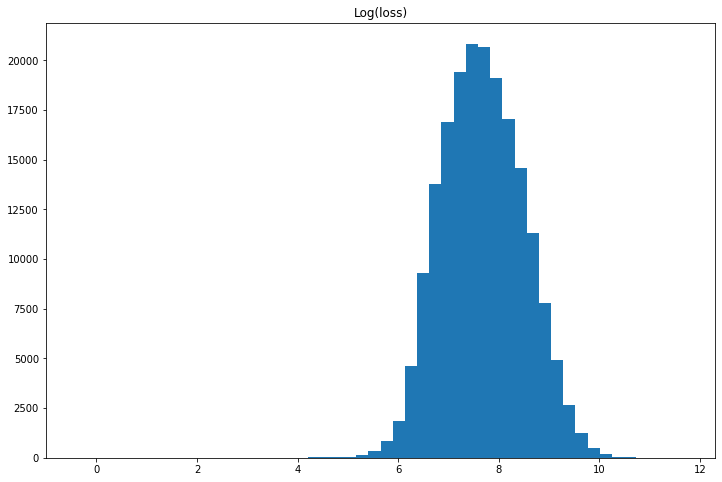

In [5]:
plt.figure(figsize=(12,8))
plt.hist(np.log(df['loss']),bins=50)
plt.title('Log(loss)')

# Data Visualization

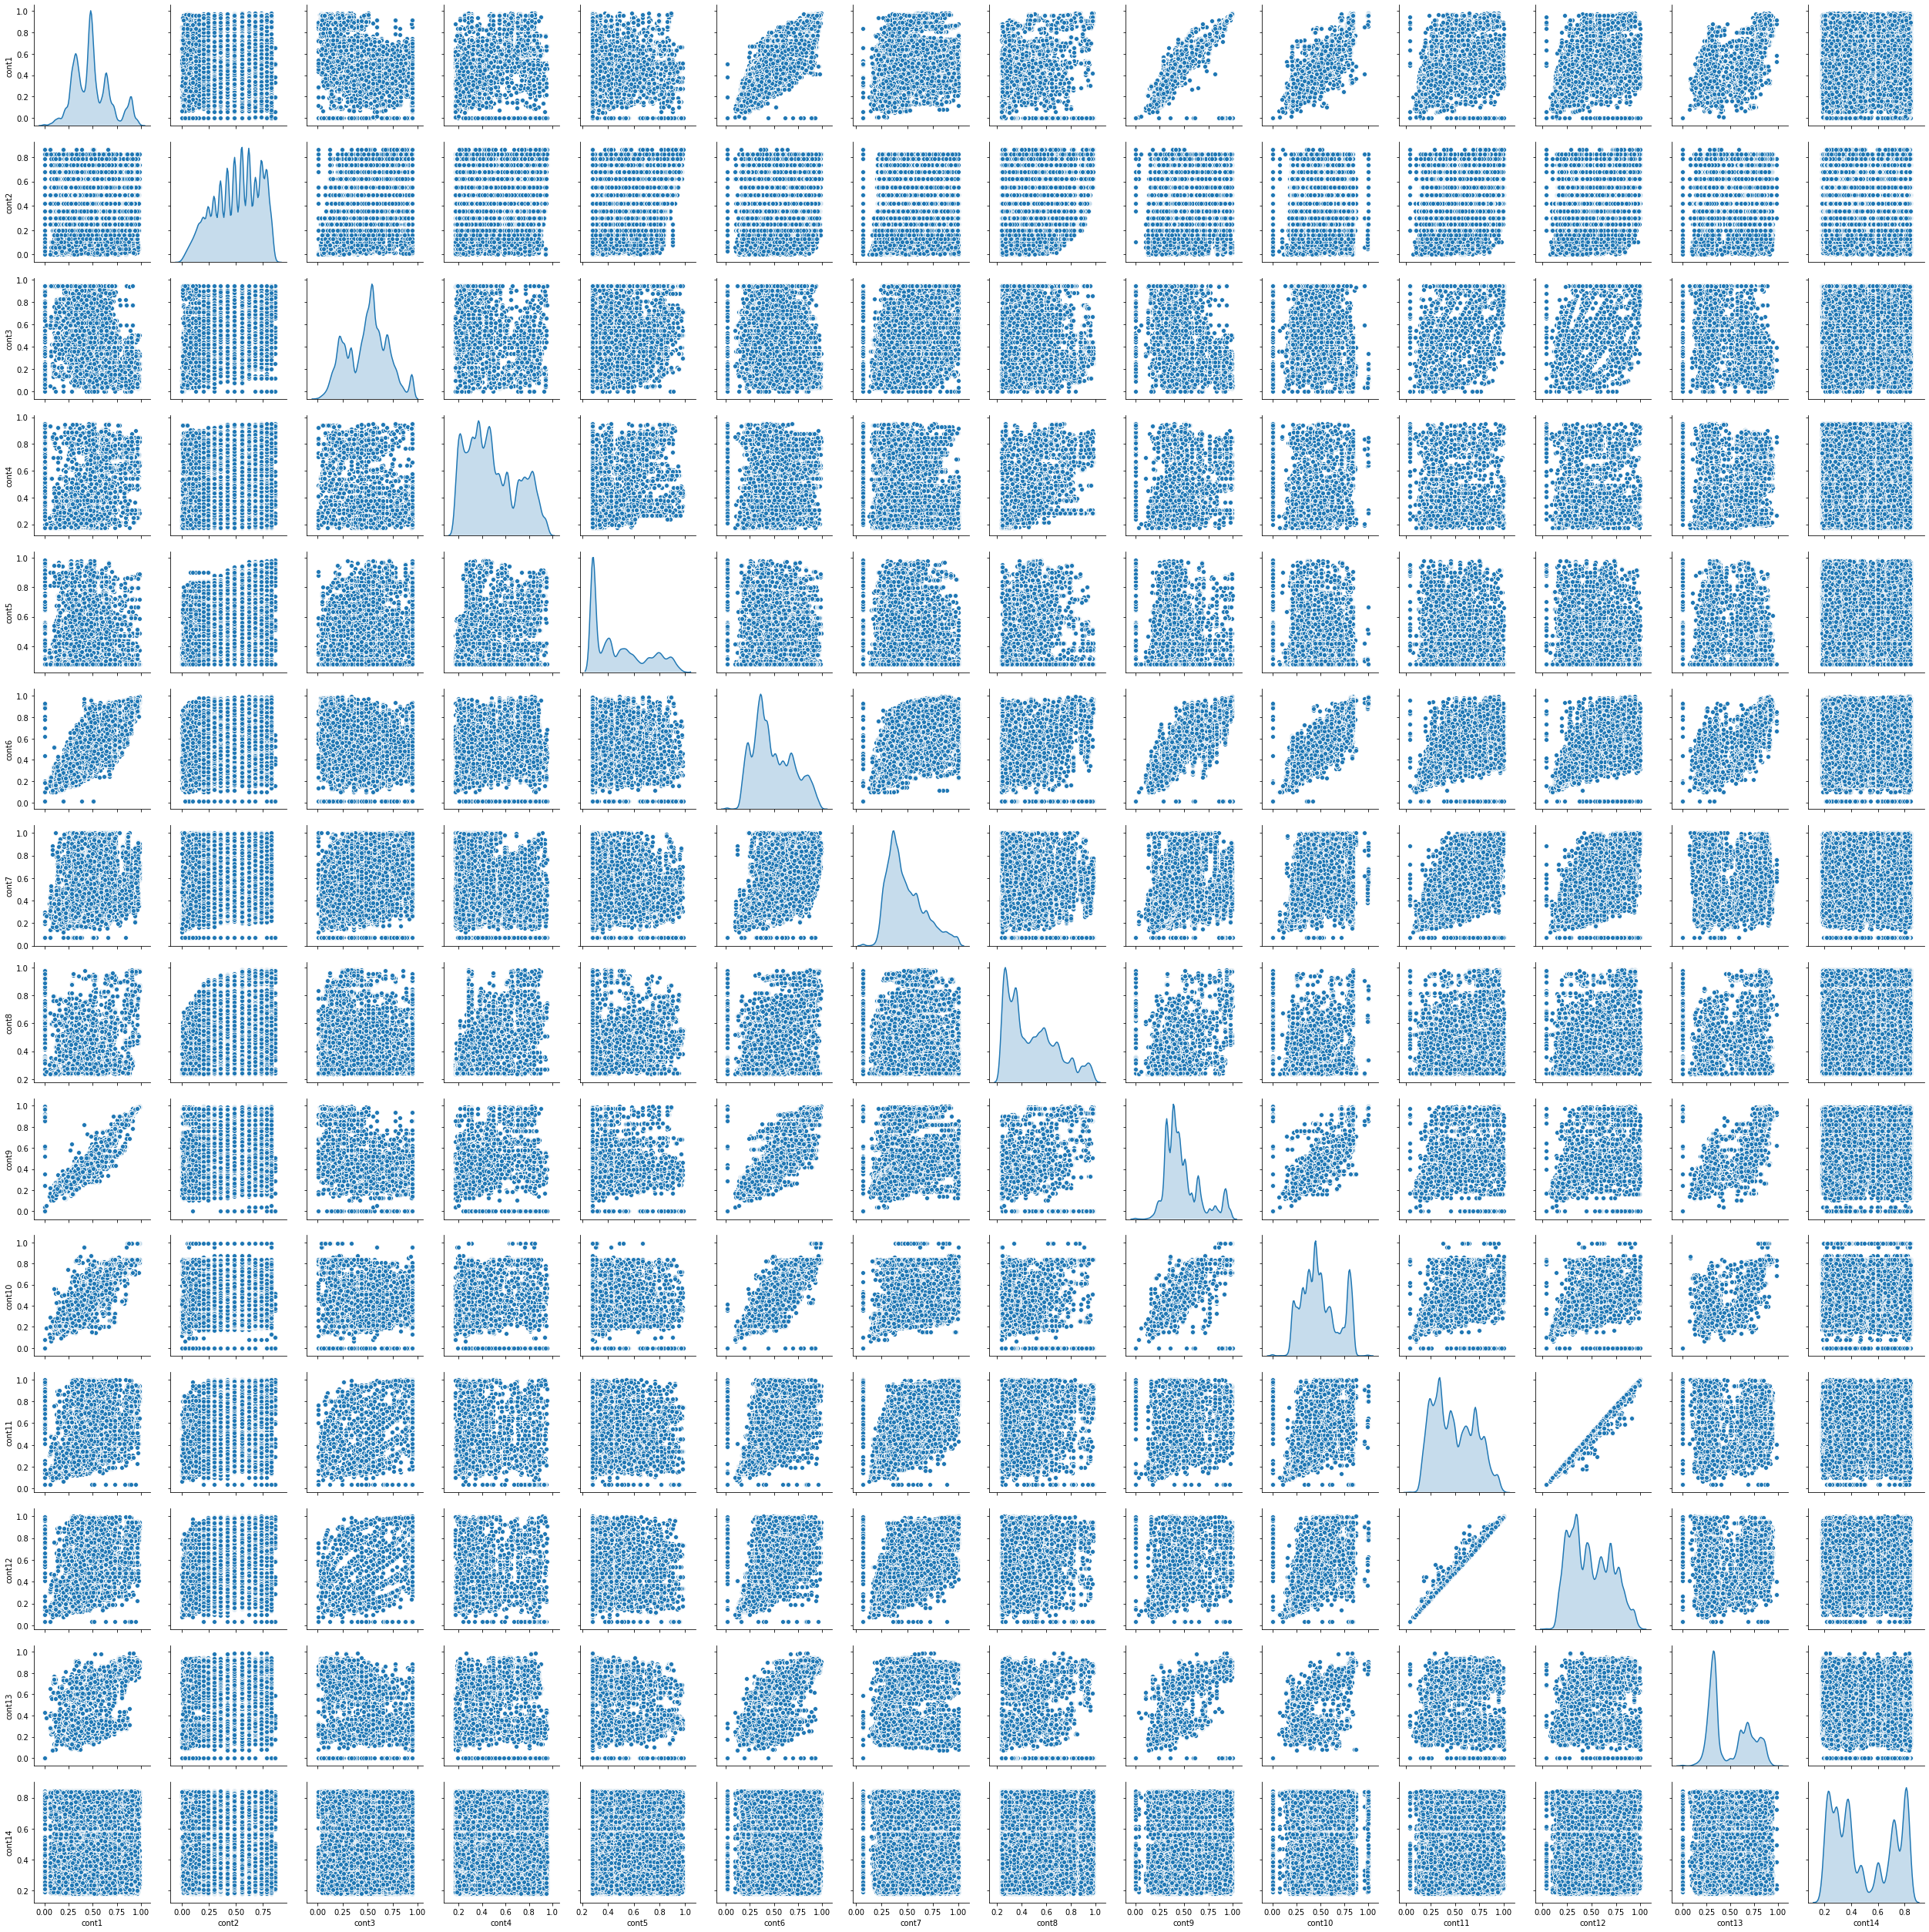

In [6]:
import seaborn as sns

cat_features = list(df.select_dtypes(include=['object']).columns)
cont_features = [cont for cont in list(df.select_dtypes(include=['float64','int64']).columns)
                 if cont not in ['loss','id']]
g = sns.pairplot(df[cont_features],diag_kind='kde')

In [7]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore categorical data

#range of features considered
split = 116 
#number of features considered
size = 15

#create a dataframe with only continuous features
data=df.iloc[:,split:] 
#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


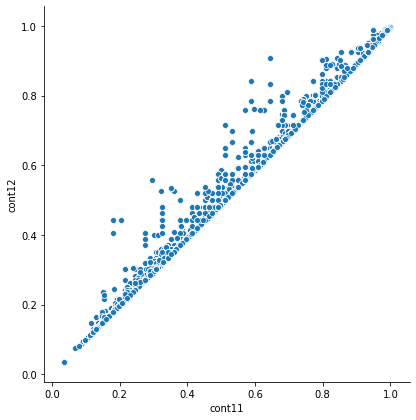

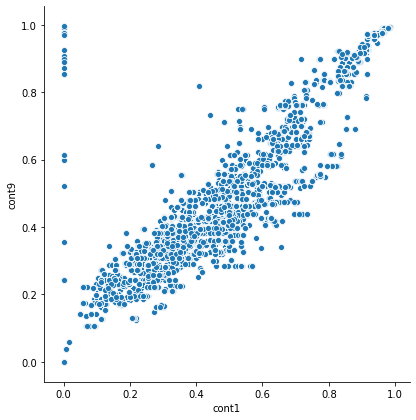

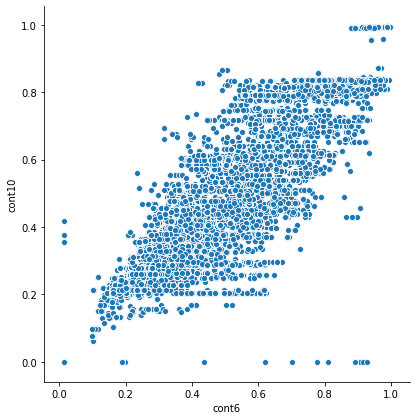

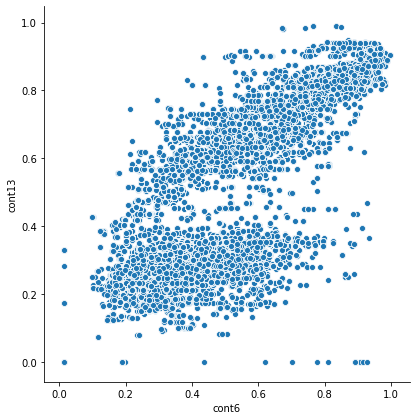

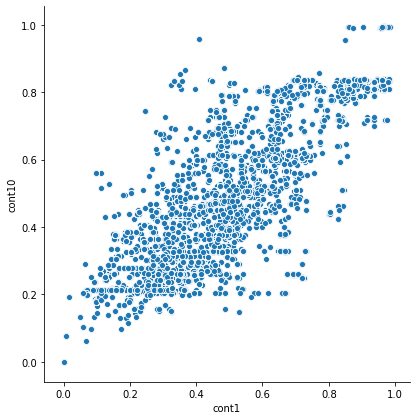

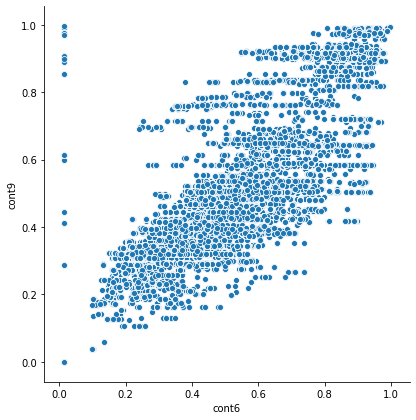

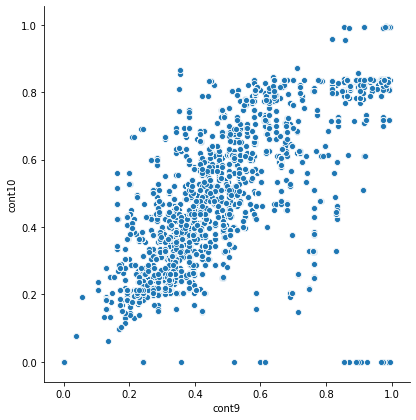

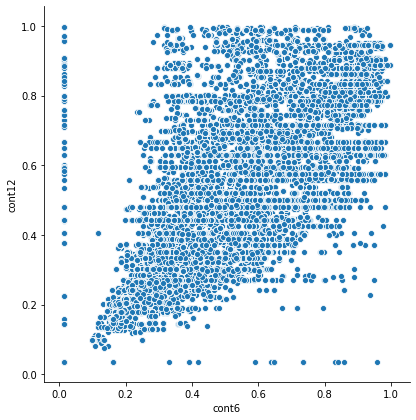

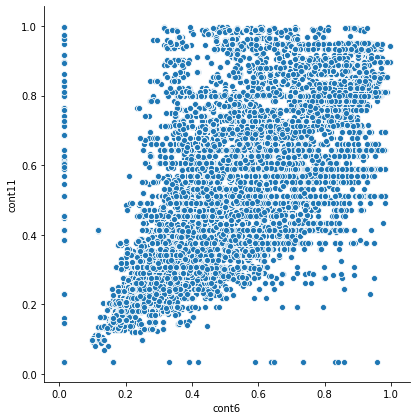

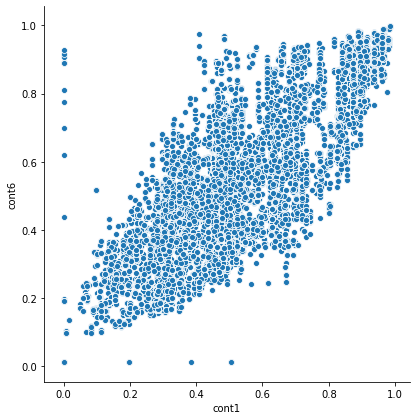

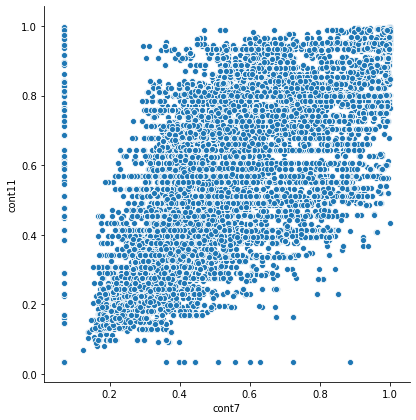

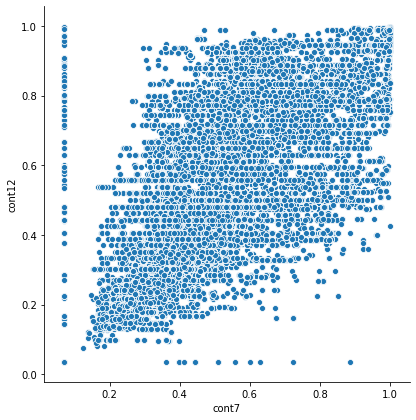

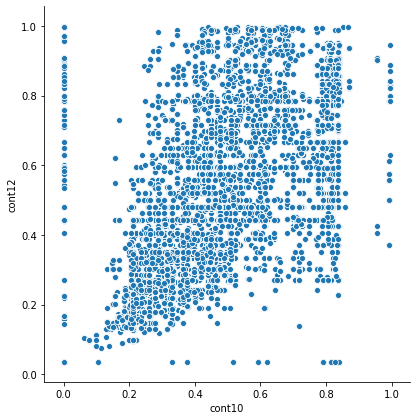

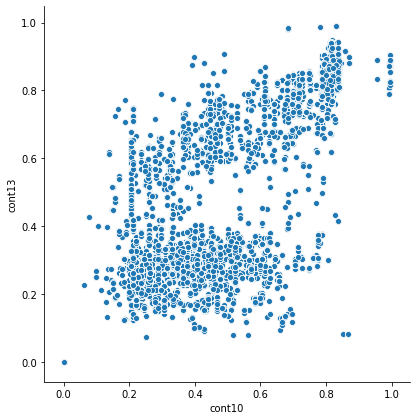

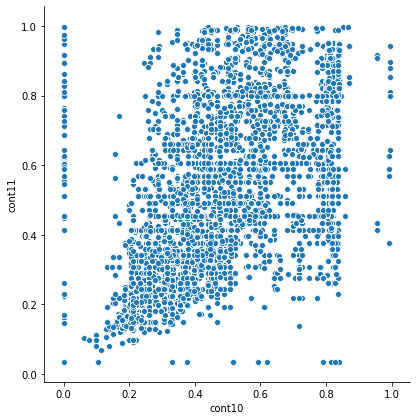

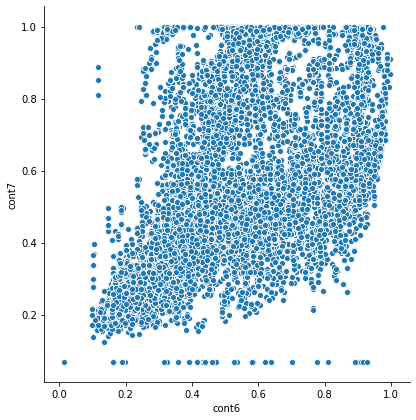

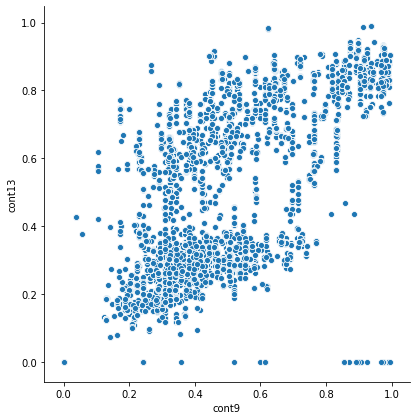

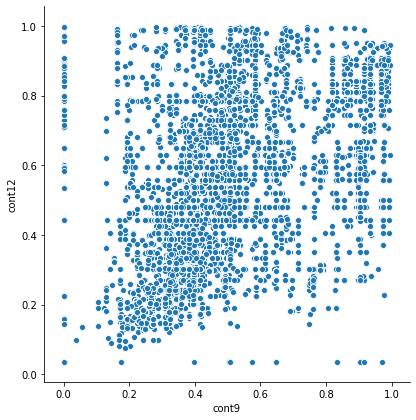

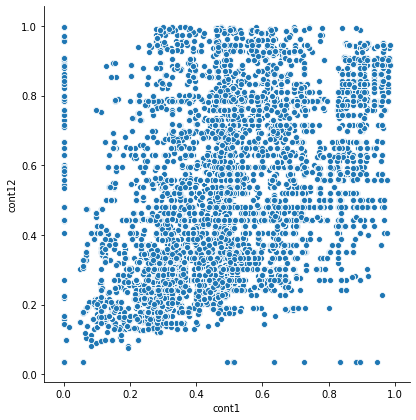

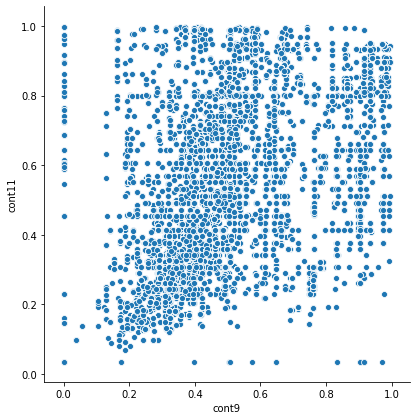

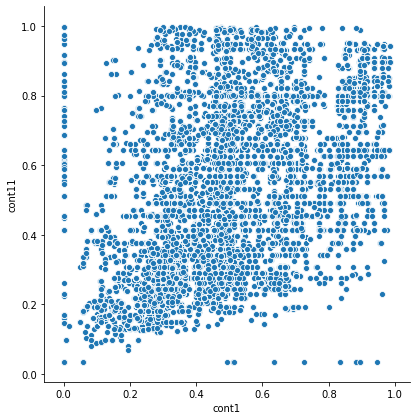

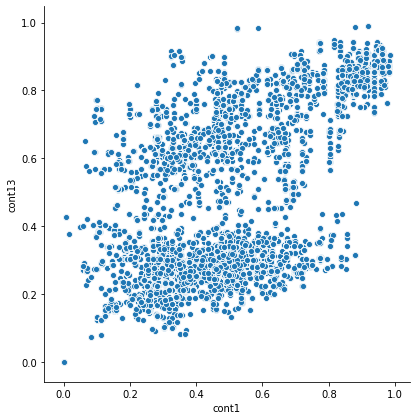

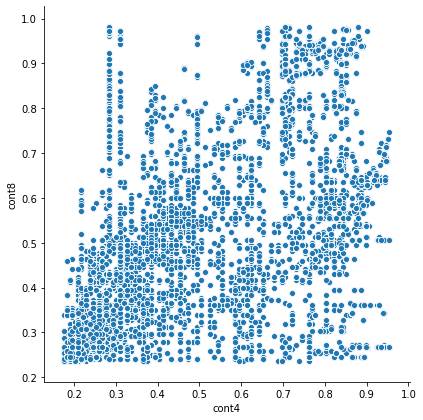

In [8]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(df, size=6, x_vars=cols[i],y_vars=cols[j])
    plt.show()

#cont11 and cont12 give an almost linear pattern...one must be removed
#cont1 and cont9 are highly correlated ...either of them could be safely removed 
#cont6 and cont10 show very good correlation too

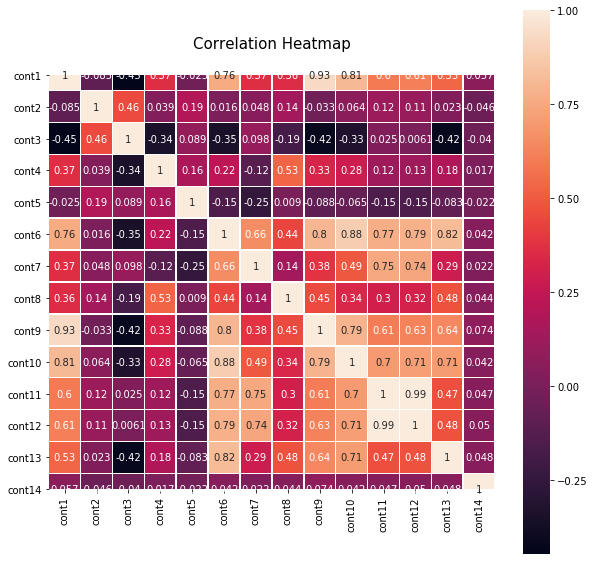

In [9]:
# Heatmap
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap', y=1.05, size=15)
sns.heatmap(df.drop(['loss'],axis=1,inplace=False).corr(),linewidths=0.5, square=True, annot=True)
plt.show()

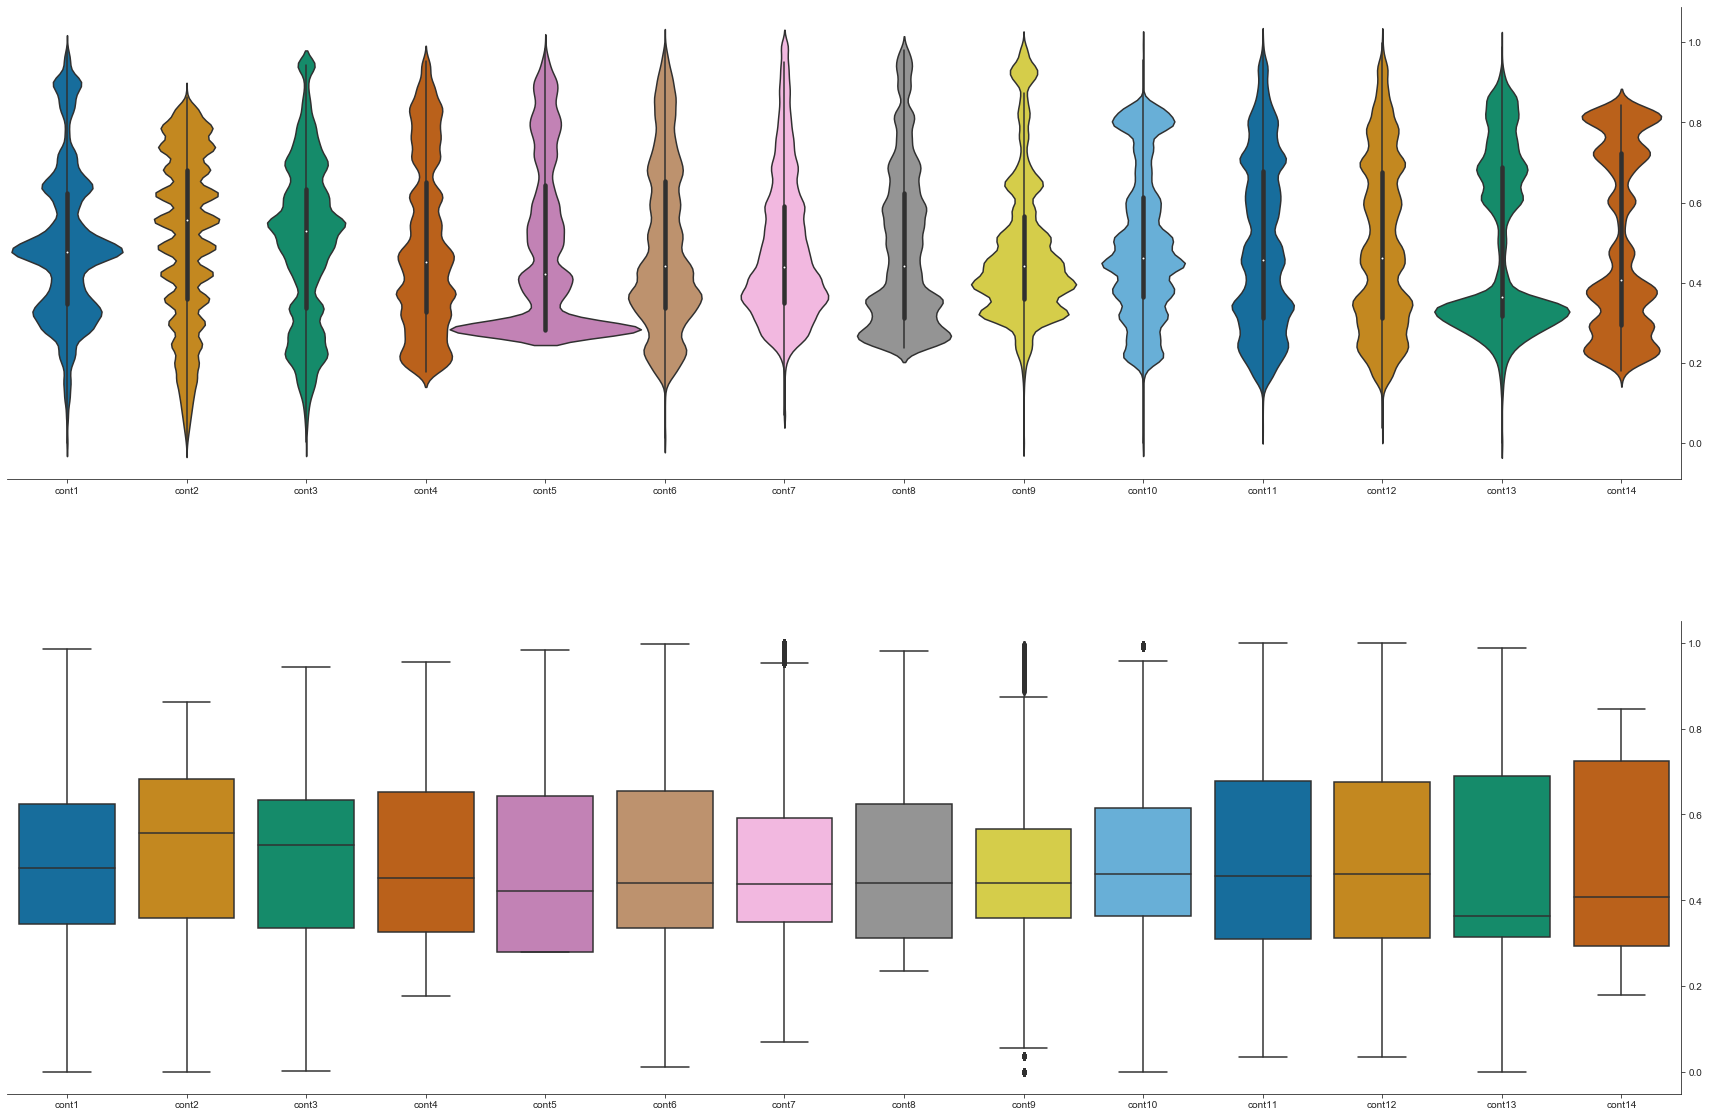

In [10]:
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(hspace=0.3)

sns.set_style("ticks")

ax1 = fig.add_subplot(2,1,1)
sns.violinplot(data=df.drop(['loss'],axis=1,inplace=False),width=1.6,palette="colorblind") 


ax2 = fig.add_subplot(2,1,2)
sns.boxplot(data=df.drop(['loss'],axis=1,inplace=False),palette="colorblind")
sns.despine(left=True, right = False) 

#cont1 has many values close to 0.5
#cont2 has a pattern where there a several spikes at specific points
#cont5 has many values near 0.3
#cont14 has a distinct pattern. 0.22 and 0.82 have a lot of concentration
#loss distribution must be converted to normal

In [11]:
# Skewness of the distribution

df.skew()

# Values close to 0 show less ske
# Since loss shows the highest skew. so take log(1+x) to visualize it

cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
loss      3.794958
dtype: float64

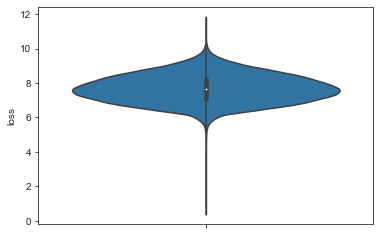

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#log1p function applies log(1+x) to all elements of the column
df["loss"] = np.log1p(df["loss"])
#visualize the transformed column
sns.violinplot(data=df,y="loss")  
plt.show()

#Plot shows that skew is corrected to a large extent

# Data Preperation

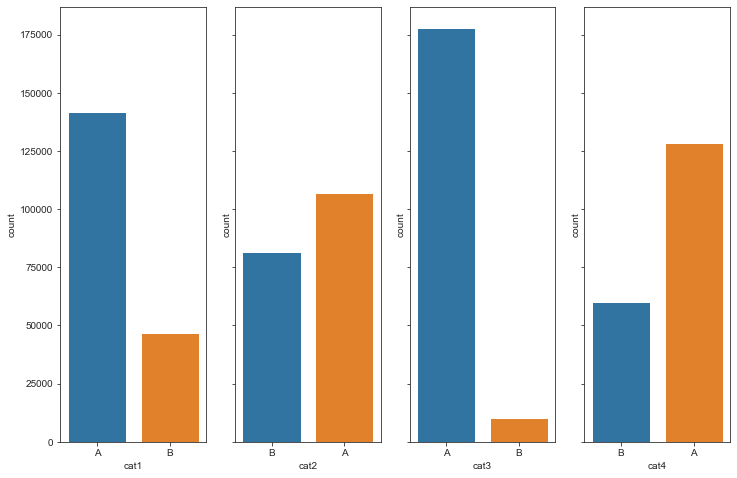

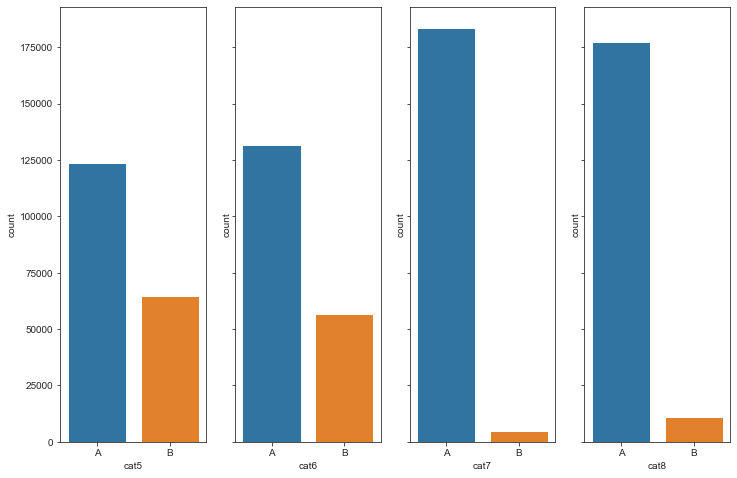

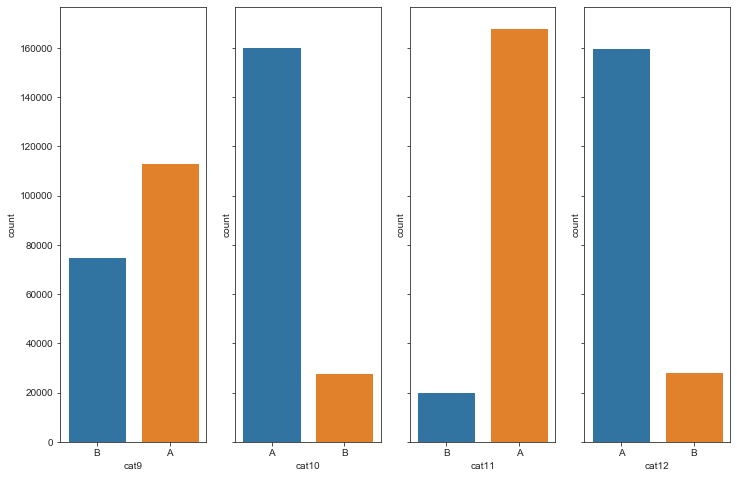

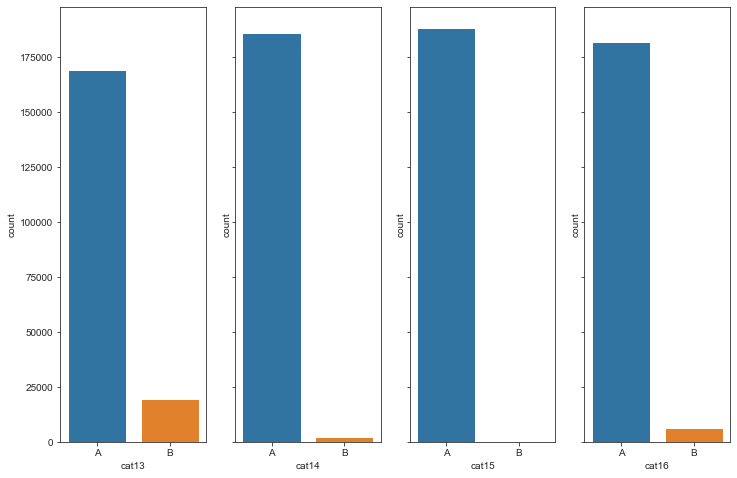

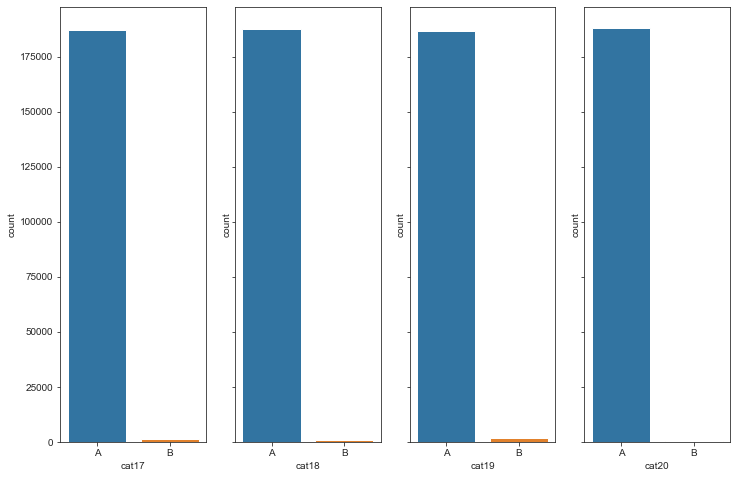

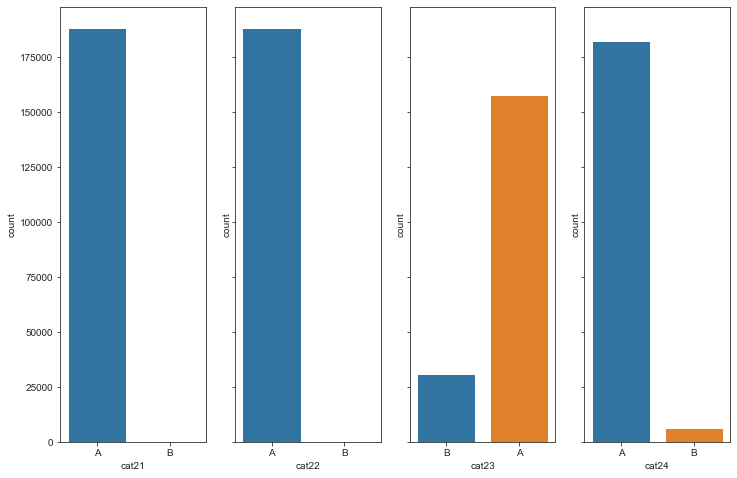

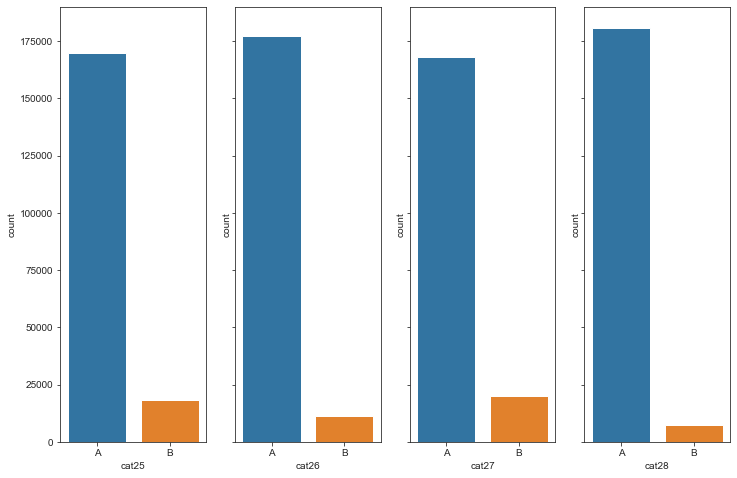

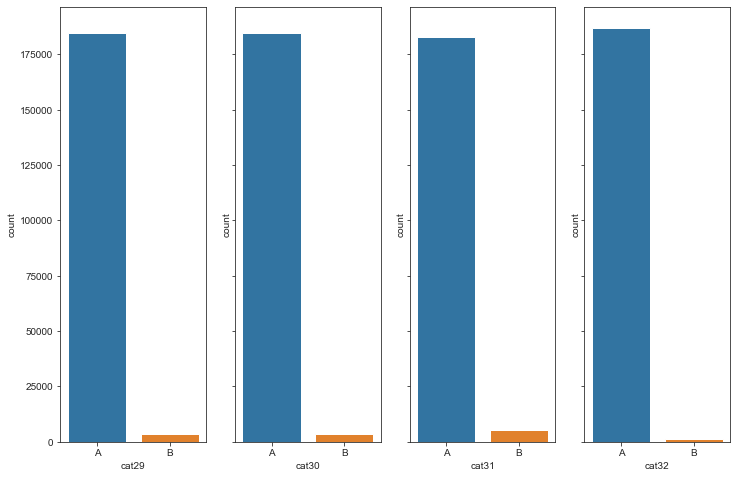

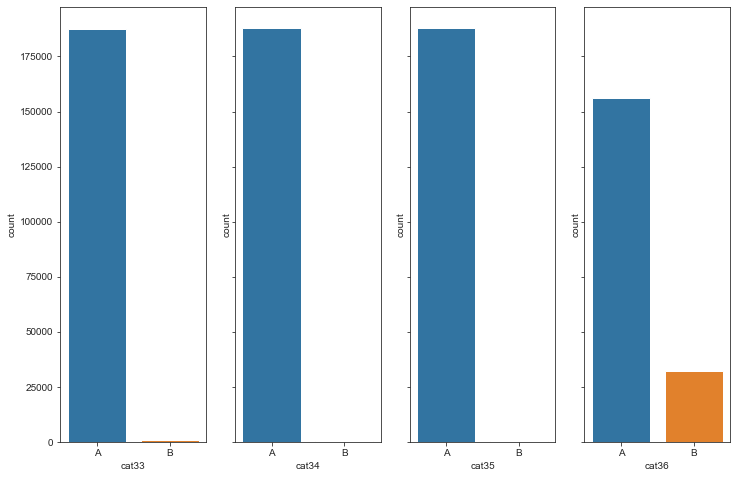

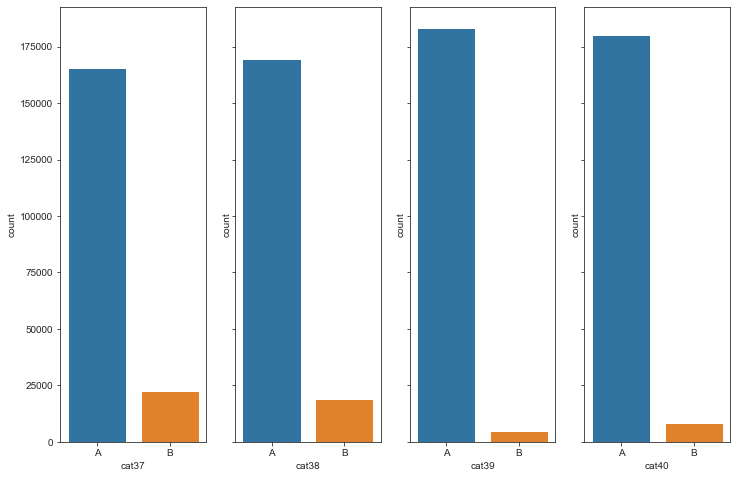

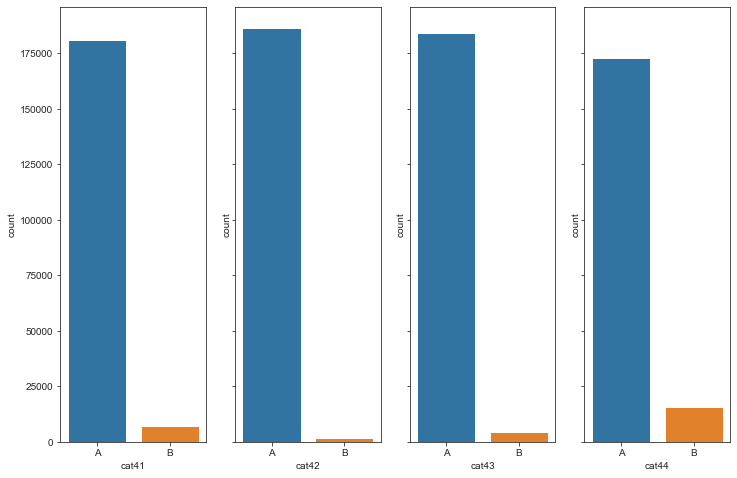

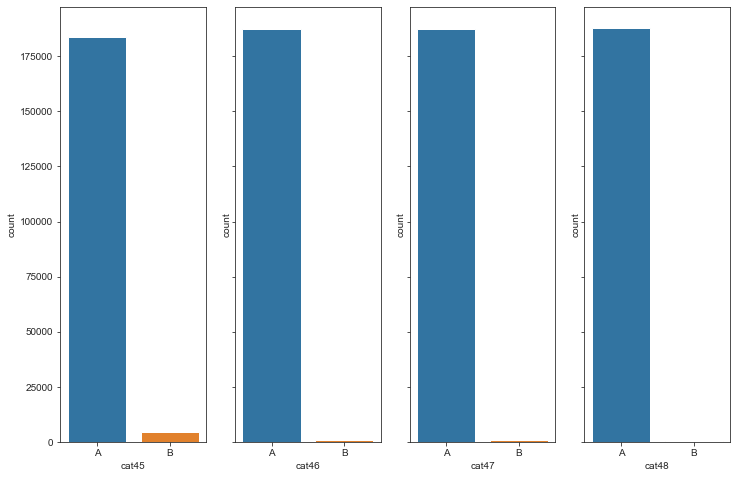

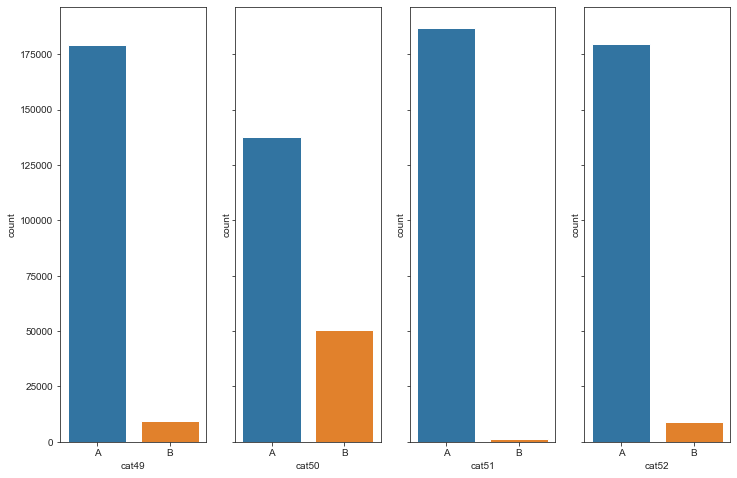

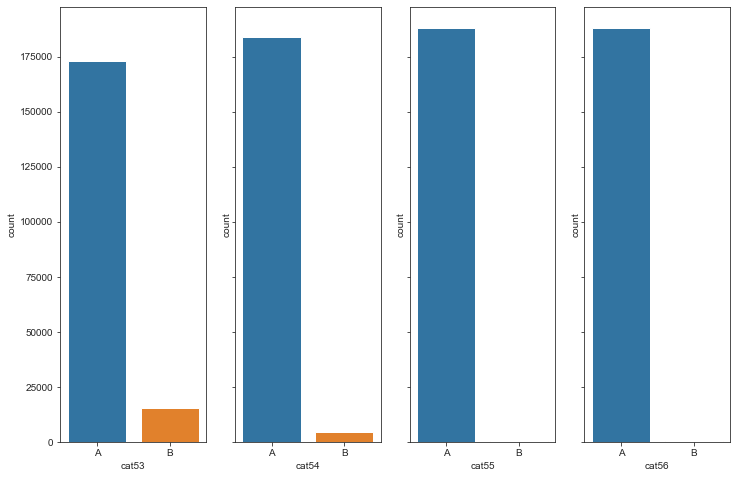

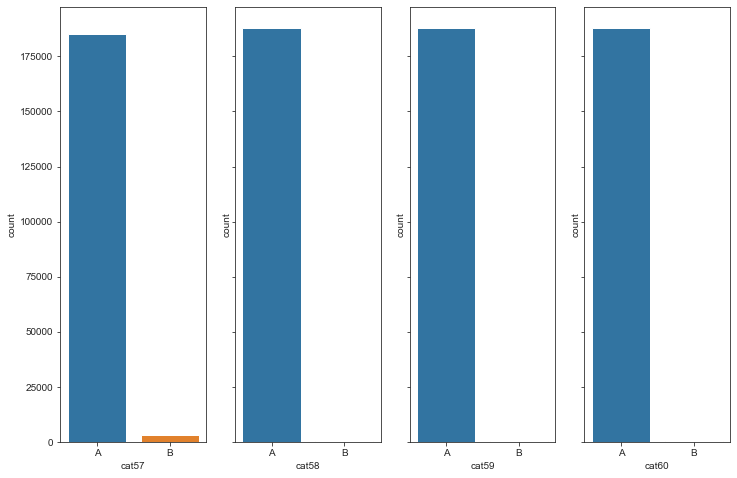

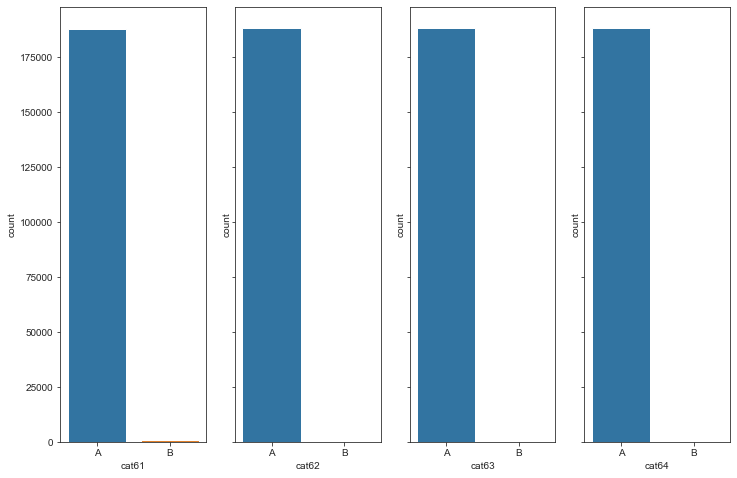

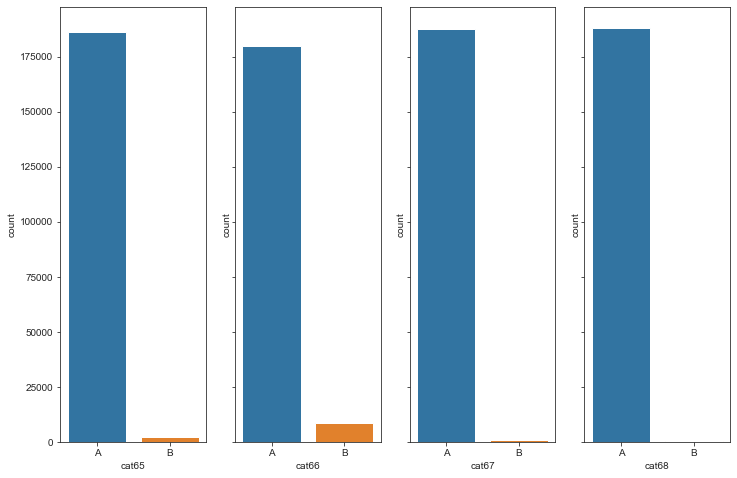

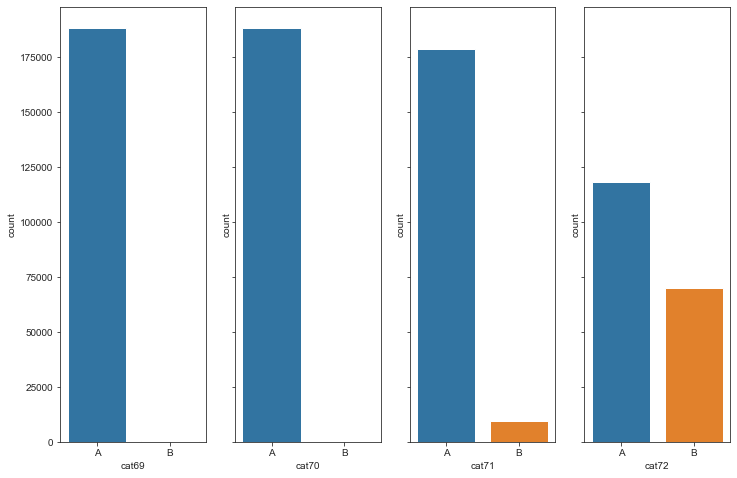

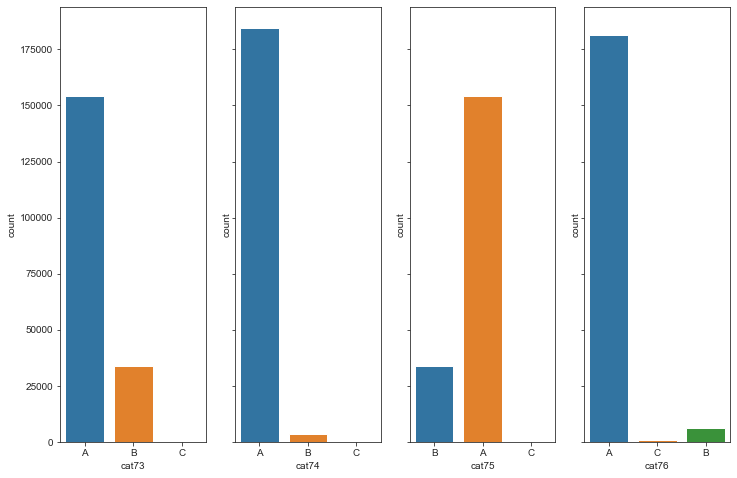

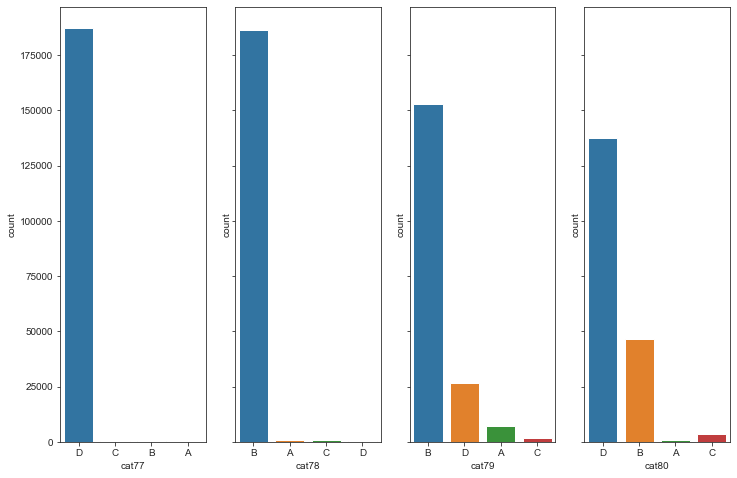

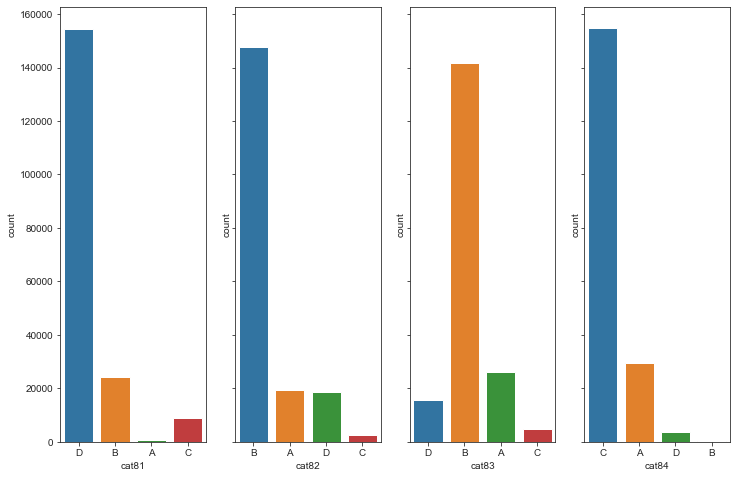

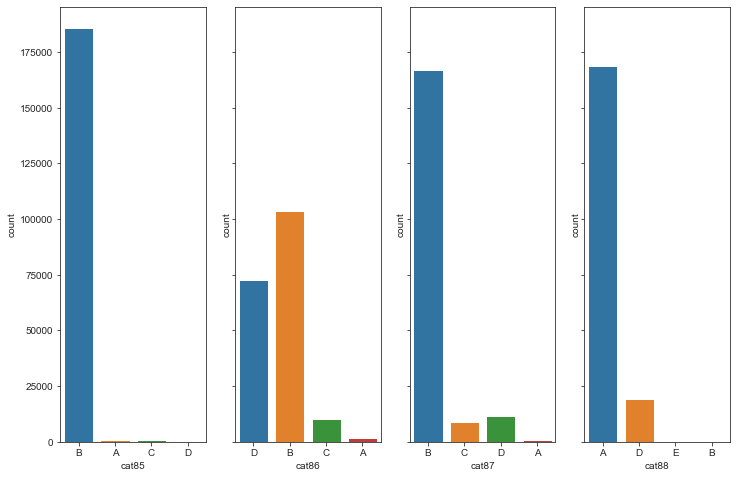

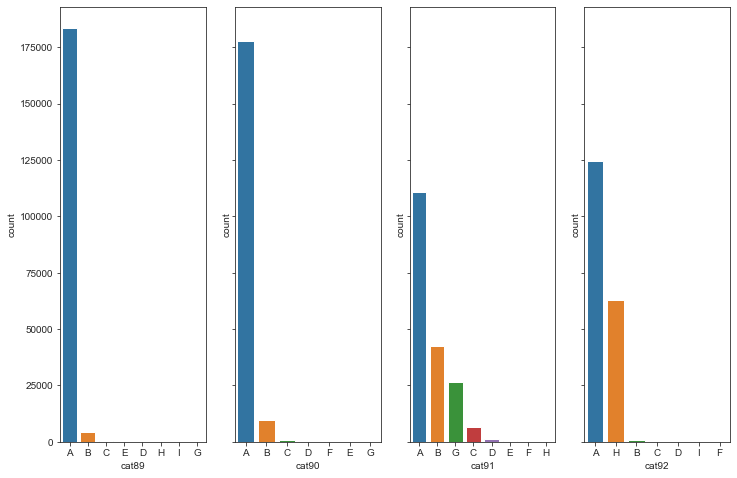

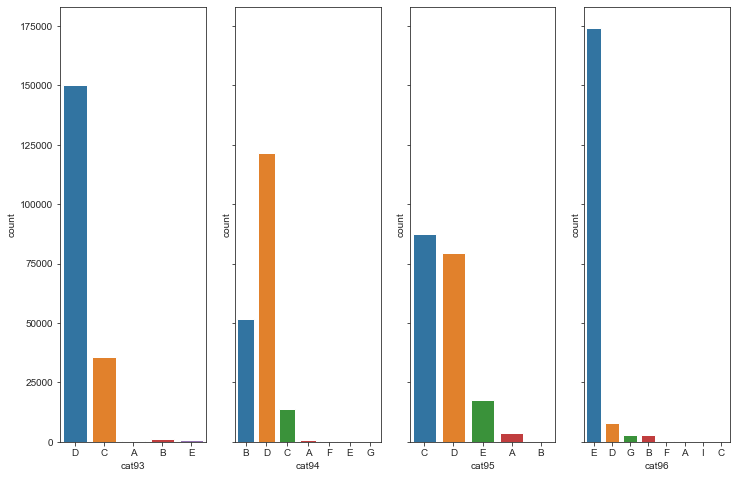

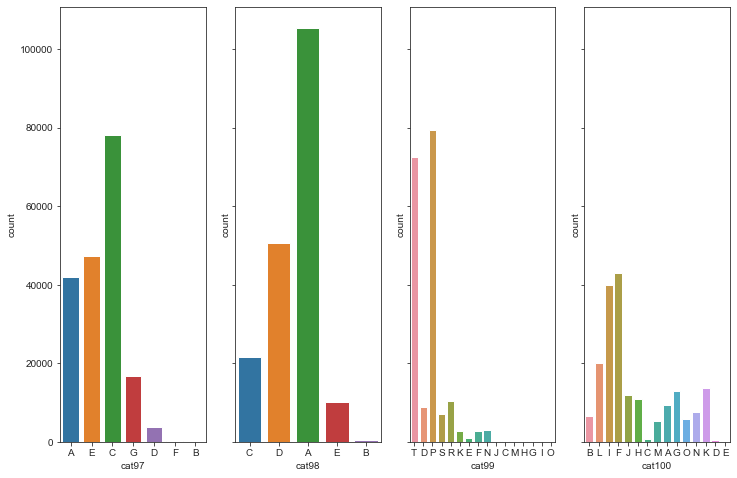

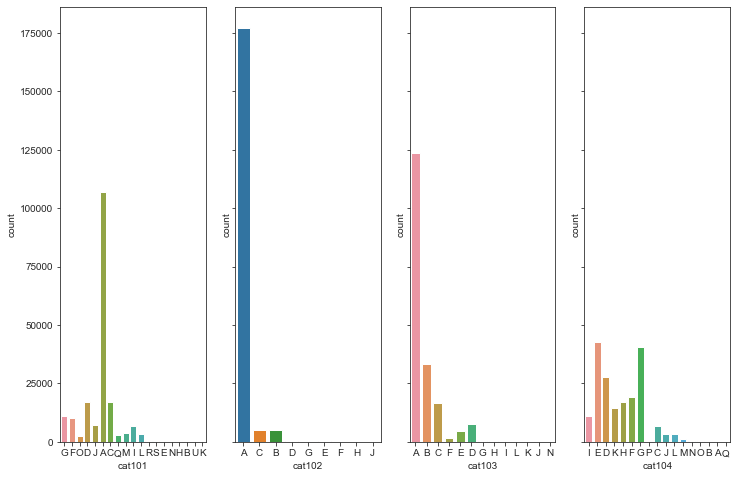

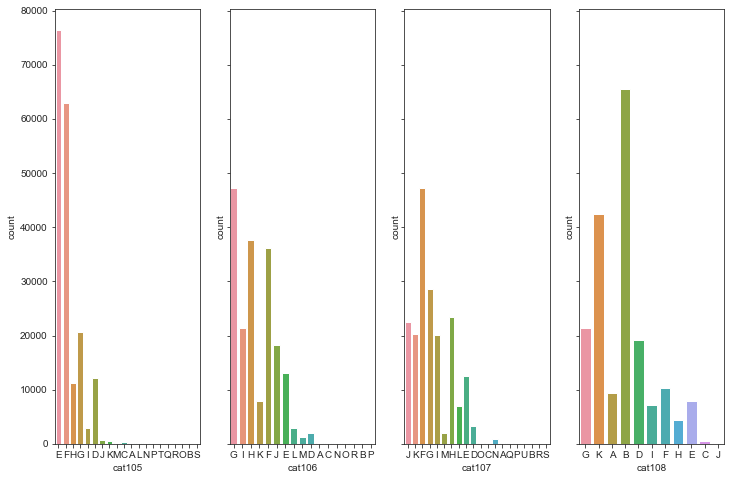

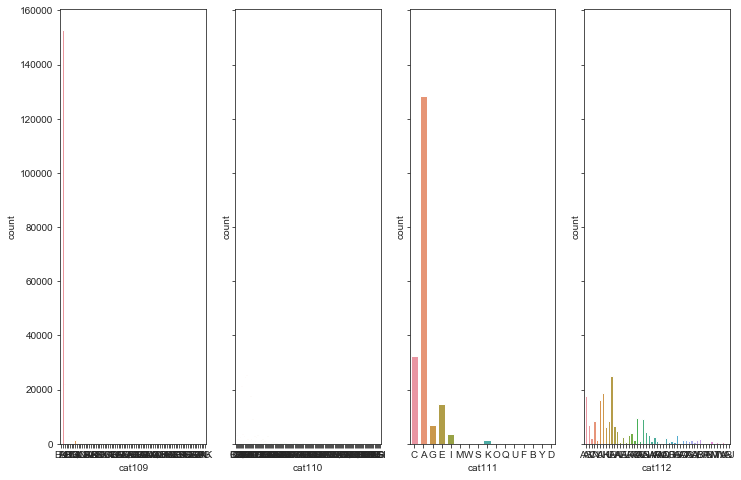

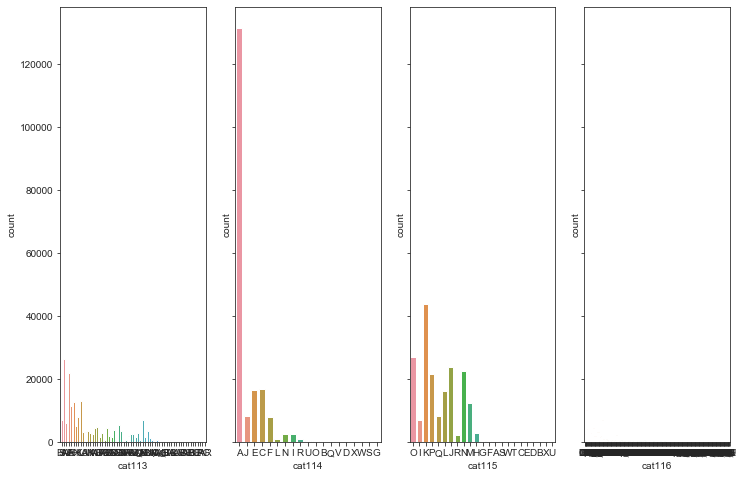

In [13]:
# Count of each label in each category

#names of all the columns
cols_all = df.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        sns.countplot(x=cols_all[i*n_cols+j], data=df, ax=ax[j])

#cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries
#cat73 to cat 108 have more than two labels
#cat109 to cat116 have many labels

In [17]:
cols_all = df.columns
split = 116
#cat1 to cat116 have strings. The ML algorithms we are going to study require numberical data
#One-hot encoding converts an attribute to a binary vector
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#Variable to hold the list of variables for an attribute in the train and test data
labels = []

for i in range(0,split):
    train = df[cols_all[i]].unique()    
    test = dataset_test[cols_all[i]].unique()
    labels.append(list(set(train) | set(test)))  

#Import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(df.iloc[:,i])
    feature = feature.reshape(df.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = np.column_stack(cats)

# Print the shape of the encoded data
print(encoded_cats.shape)

#Concatenate encoded attributes with continuous attributes
df_encoded = np.concatenate((encoded_cats,df.iloc[:,split:].values),axis=1)
del cats
del feature
del encoded_cats
print(df_encoded.shape)

(188318, 1139)
(188318, 1154)


In [18]:
#get the number of rows and columns
r, c = df_encoded.shape

#create an array which has indexes of columns
i_cols = []
for i in range(0,c-1):
    i_cols.append(i)

#Y is the target column, X has the rest
X = df_encoded[:,0:(c-1)]
# dataset with only continuous variables
X_cont = df_encoded[:,(c-15):(c-1)]

Y = df_encoded[:,(c-1)]
del df_encoded

#Validation chunk size
val_size = 0.1


from sklearn.decomposition import PCA

pca=PCA(n_components=6)   # Due to heatmap, select 6  
reduced_x=pca.fit_transform(X_cont)

#Split the data into chunks
#Use a common seed in all experiments so that same chunk is used for validation
seed = 0
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=seed)
X_cont_train, X_cont_val, Y_cont_train, Y_cont_val = train_test_split(reduced_x, Y, test_size=val_size, random_state=seed)
del X
del Y

#All features
X_all = []



#Scoring parameter
from sklearn.metrics import mean_absolute_error

#Add this version of X to the list 
n = "All"
#X_all.append([n, X_train,X_val,i_cols])
X_all.append([n, i_cols])

In [19]:
#List of combinations
comb = []

#Dictionary to store the MAE for all algorithms 
mae = []

In [20]:
from sklearn import model_selection, metrics   #Additional     scklearn functions
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score #Perforing grid search
from sklearn.metrics import accuracy_score,roc_auc_score, log_loss

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
algo = "LR"
model = LinearRegression(n_jobs=-1)

model.fit(X_train,Y_train)
result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val)))

mae.append(result)   
comb.append(algo)

print('MAE of model with all features %s is: %d'%(algo,result))

MAE of model with all features LR is: 1274


In [20]:
algo = 'LR_cont'
model.fit(X_cont_train,Y_cont_train)
result = mean_absolute_error(np.expm1(Y_cont_val), np.expm1(model.predict(X_cont_val)))

mae.append(result)   
comb.append(algo)
print('MAE of model with all continuous features %s is: %d'%(algo,result))

MAE of model with all continuous features LR_cont is: 1802


# KNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = [
{'n_neighbors': [1,3,5]}]

 
knn_rgr = KNeighborsRegressor()
grid_search = GridSearchCV(knn_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_train, Y_train)
n_neighbors = grid_search.best_params_['n_neighbors']
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed: 788.0min remaining: 225.1min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 903.4min finished


{'n_neighbors': 5}

In [12]:
model = KNeighborsRegressor(n_neighbors=n_neighbors,n_jobs=-1)
    
algo = "KNN"

model.fit(X_train,Y_train)
result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val)))

mae.append(result)         
comb.append(algo)

print('MAE of model with all features %s is: %d'%(algo,result))    

#Very high computation time
#Best estimated performance is 1745 for n=1

MAE of model with all features KNN is: 1434


In [13]:
param_grid = [
{'n_neighbors': [1,3,5]}]

 
knn_rgr = KNeighborsRegressor()
grid_search = GridSearchCV(knn_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_cont_train, Y_cont_train)
n_neighbors = grid_search.best_params_['n_neighbors']
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   22.6s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   23.7s finished


{'n_neighbors': 5}

In [14]:
model = KNeighborsRegressor(n_neighbors=n_neighbors,n_jobs=-1)
algo = 'KNN_cont'
model.fit(X_cont_train,Y_cont_train)
result = mean_absolute_error(np.expm1(Y_cont_val), np.expm1(model.predict(X_cont_val)))

mae.append(result)   
comb.append(algo)
print('MAE of model with all continuous features %s is: %d'%(algo,result))

MAE of model with all continuous features KNN_cont is: 1907


# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

param_grid = [
{'max_depth':[1,3,5,10]}]

dt_rgr = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_train, Y_train)
max_depth = grid_search.best_params_['max_depth']
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  2.5min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.5min finished


{'max_depth': 10}

In [25]:
model = DecisionTreeRegressor(max_depth=max_depth,random_state=seed)
algo = "CART"

model.fit(X_train,Y_train)
result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val)))


mae.append(result)
comb.append(algo)
print('MAE of model with all features %s is: %d'%(algo,result))

MAE of model with all features CART is: 1309


In [22]:
param_grid = [
{'max_depth':[1,3,5,10]}]

dt_rgr = DecisionTreeRegressor()
grid_search = GridSearchCV(dt_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_cont_train, Y_cont_train)
max_depth = grid_search.best_params_['max_depth']
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    3.4s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    5.1s finished


{'max_depth': 5}

In [23]:
model = DecisionTreeRegressor(max_depth=max_depth,random_state=seed)
algo = "CART_cont"

model.fit(X_cont_train,Y_cont_train)
result = mean_absolute_error(np.expm1(Y_cont_val), np.expm1(model.predict(X_cont_val)))

mae.append(result)   
comb.append(algo)
print('MAE of model with all continuous features %s is: %d'%(algo,result))

MAE of model with all continuous features CART_cont is: 1795


# SVM

In [22]:
from sklearn.svm import LinearSVR

param_grid = [
{'C':[0.01,1,10,100]}]

svm_rgr = LinearSVR()
grid_search = GridSearchCV(svm_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_train, Y_train)
C = grid_search.best_params_['C']
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  6.0min finished
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  6.0min remaining:    0.0s


{'C': 0.01}

In [23]:
model = LinearSVR(C=C)
algo = "SVM"

model.fit(X_train,Y_train)
result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val)))

mae.append(result)
comb.append(algo)
print('MAE of model with all features %s is: %d'%(algo,result))

MAE of model with all features SVM is: 1265


In [24]:
param_grid = [
{'C':[0.01,1,10,100]}]

svm_rgr = LinearSVR()
grid_search = GridSearchCV(svm_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_cont_train, Y_cont_train)
C = grid_search.best_params_['C']
grid_search.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   32.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   32.9s finished


{'C': 10}

In [25]:
model = LinearSVR(C=C)
algo = "SVM_cont"

model.fit(X_cont_train,Y_cont_train)
result = mean_absolute_error(np.expm1(Y_cont_val), np.expm1(model.predict(X_cont_val)))

mae.append(result)   
comb.append(algo)
print('MAE of model with all continuous features %s is: %d'%(algo,result))

MAE of model with all continuous features SVM_cont is: 1801


# Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

param_grid = [
{'n_estimators': [10, 50, 100]}]

rf_rgr = RandomForestRegressor()
grid_search = GridSearchCV(rf_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_train, Y_train)
n_estimators = grid_search.best_params_['n_estimators']
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed: 41.9min remaining: 52.4min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 65.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 65.3min finished


{'n_estimators': 100}

In [16]:
model = RandomForestRegressor(n_jobs=-1,n_estimators=n_estimators,random_state=seed)
algo = "RF"

model.fit(X_train,Y_train)
result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val)))

mae.append(result)
comb.append(algo)
print('MAE of model with all features %s is: %d'%(algo,result))

MAE of model with all features RF is: 1207


In [27]:
param_grid = [
{'n_estimators': [10, 50, 100]}]

rf_rgr = RandomForestRegressor()
grid_search = GridSearchCV(rf_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_cont_train, Y_cont_train)
n_estimators = grid_search.best_params_['n_estimators']
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  2.2min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  4.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  4.5min finished


{'n_estimators': 100}

In [28]:
model = RandomForestRegressor(n_jobs=-1,n_estimators=n_estimators,random_state=seed)
algo = "RF_cont"

model.fit(X_cont_train,Y_cont_train)
result = mean_absolute_error(np.expm1(Y_cont_val), np.expm1(model.predict(X_cont_val)))

mae.append(result)   
comb.append(algo)
print('MAE of model with all continuous features %s is: %d'%(algo,result))

MAE of model with all continuous features RF_cont is: 1967


# Adaboost

In [13]:
from sklearn.ensemble import AdaBoostRegressor

param_grid = [
{'n_estimators': [10, 50, 100]}]

ada_rgr = AdaBoostRegressor()
grid_search = GridSearchCV(ada_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_train, Y_train)
n_estimators = grid_search.best_params_['n_estimators']
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed: 30.8min remaining: 38.4min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 41.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 41.2min finished


{'n_estimators': 10}

In [14]:
model = AdaBoostRegressor(n_estimators=n_estimators,random_state=seed)
algo = "Ada"

model.fit(X_train,Y_train)
result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val)))

mae.append(result)
comb.append(algo)
print('MAE of model with all features %s is: %d'%(algo,result))

MAE of model with all features Ada is: 1503


In [29]:
param_grid = [
{'n_estimators': [10, 50, 100]}]

ada_rgr = AdaBoostRegressor()
grid_search = GridSearchCV(ada_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_cont_train, Y_cont_train)
n_estimators = grid_search.best_params_['n_estimators']
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   24.7s remaining:   30.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   32.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   32.6s finished


{'n_estimators': 10}

In [30]:
model = AdaBoostRegressor(n_estimators=n_estimators,random_state=seed)
algo = "Ada_cont"

model.fit(X_cont_train,Y_cont_train)
result = mean_absolute_error(np.expm1(Y_cont_val), np.expm1(model.predict(X_cont_val)))

mae.append(result)   
comb.append(algo)
print('MAE of model with all continuous features %s is: %d'%(algo,result))

MAE of model with all continuous features Ada_cont is: 1800


# XGBoost

In [11]:
from xgboost import XGBRegressor

param_grid = [
{'n_estimators': [50, 100, 1000]}]

xgb_rgr = XGBRegressor()
grid_search = GridSearchCV(xgb_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_train, Y_train)
n_estimators = grid_search.best_params_['n_estimators']
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed: 58.8min remaining: 73.5min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 256.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 256.0min finished


{'n_estimators': 100}

In [12]:
model = XGBRegressor(n_estimators=n_estimators,seed=seed)
algo = "XGB"

model.fit(X_train,Y_train)
result = mean_absolute_error(np.expm1(Y_val), np.expm1(model.predict(X_val)))

mae.append(result)
comb.append(algo )
print('MAE of model with all features %s is: %d'%(algo,result))

MAE of model with all features XGB is: 1167


In [14]:
from xgboost import XGBRegressor

param_grid = [
{'n_estimators': [50, 100, 1000]}]

xgb_rgr = XGBRegressor()
grid_search = GridSearchCV(xgb_rgr,param_grid,n_jobs=-1,verbose=2,cv=3)
grid_search.fit(X_cont_train, Y_cont_train)
n_estimators = grid_search.best_params_['n_estimators']
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:  2.7min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 13.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 13.9min finished


{'n_estimators': 50}

In [15]:
model = XGBRegressor(n_estimators=n_estimators,seed=seed)
algo = "XGB_cont"

model.fit(X_cont_train,Y_cont_train)
result = mean_absolute_error(np.expm1(Y_cont_val), np.expm1(model.predict(X_cont_val)))

mae.append(result)   
comb.append(algo)
print('MAE of model with all continuous features %s is: %d'%(algo,result))

MAE of model with all continuous features XGB_cont is: 1785


# MLP

In [2]:
train = pd.read_csv('train.csv')
cat_features = list(train.select_dtypes(include=['object']).columns)
cont_features = [cont for cont in list(train.select_dtypes(include=['float64','int64']).columns)
                 if cont not in ['loss','id']]

In [3]:
from sklearn.preprocessing import OneHotEncoder

def make_onehot(train):
    '''Initialize OneHotEncoder, fit the entire the trainning set'''
    enc = OneHotEncoder()
    cat = enc.fit_transform(train[cat_features]).toarray()
    cat = pd.DataFrame(cat)
    onecoded_train = pd.merge(train[cont_features],cat,left_index=True,right_index=True,how='left')
    return onecoded_train

In [4]:
def transform(X):
    '''Onehot encodes the sample with initialized OneHotEncoder'''
    trans = enc.transform(X.loc[:,cat_features]).toarray()
    trans = pd.DataFrame(trans)
    transformed_X = pd.merge(X[cont_features],trans,left_index=True,right_index=True,how='left')
    scaler = StandardScaler().fit(make_onehot(train))
    normed_X = scaler.transform(transformed_X)
    return normed_X

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, ReLU, Softmax, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = make_onehot(train)
train_X = StandardScaler().fit_transform(X)
X = train_X
y = train['loss']

In [6]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'],hist['mae'],label='Train Error')
    plt.plot(hist['epoch'],hist['val_mae'],label='Validation Error')
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'],hist['mse'],label='Train Error')
    plt.plot(hist['epoch'],hist['val_mse'],label='Validation Error')
    plt.legend()
    plt.show()

# Define 3 Configurations for MLP with 1 hidden layer

In [23]:
def mlp_1_small():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    h0 = ReLU()(Dense(8)(input))
    out = (Dense(io_shape[1])(h0))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )
        
    return model

    
def mlp_1_medium():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    h0 = ReLU()(Dense(128)(input))
    out = (Dense(io_shape[1])(h0))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )
    
    return model

def mlp_1_large():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    h0 = ReLU()(Dense(512)(input))
    out = (Dense(io_shape[1])(h0))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )
    
    return model

# Define 3 Configurations for MLP with 2 hidden layers & dropouts

In [24]:
def mlp_2_small():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    #dropout0 = Dropout(0.4)(input)
    h0 = ReLU()(Dense(64)(input))
    #dropout1 = Dropout(0.5)(h0)
    h1 = ReLU()(Dense(16)(h0))
    #dropout2 = Dropout(0.5)(h1)
    out = (Dense(io_shape[1])(h1))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )
    
    return model

def mlp_2_medium():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    h0 = ReLU()(Dense(128)(input))
    dropout1 = Dropout(0.5)(h0)
    h1 = ReLU()(Dense(32)(dropout1))
    dropout2 = Dropout(0.5)(h1)
    out = (Dense(io_shape[1])(dropout2))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )
   
    return model

def mlp_2_large():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    h0 = ReLU()(Dense(256)(input))
    dropout1 = Dropout(0.5)(h0)
    h1 = ReLU()(Dense(64)(dropout1))
    dropout2 = Dropout(0.5)(h1)
    out = (Dense(io_shape[1])(dropout2))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )

    return model

In [25]:
model_1 = mlp_1_small()
model_2 = mlp_1_medium()
model_3 = mlp_1_large()
model_4 = mlp_2_small()
model_5 = mlp_2_medium()
model_6 = mlp_2_large()
model_list=[model_1,model_2,model_3,model_4,model_5,model_6]

------------------------------------------------------------------------------------------

Model 1 Fold 1
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125545/125545 [==============================] - 12s 99us/sample - loss: 1209.6874 - mae: 1209.6865 - mse: 4449728.0000 - val_loss: 1202.0006 - val_mae: 1202.0007 - val_mse: 4209691.0000
Epoch 2/50
125545/125545 [==============================] - 8s 66us/sample - loss: 1206.7266 - mae: 1206.7284 - mse: 4432785.5000 - val_loss: 1201.7501 - val_mae: 1201.7491 - val_mse: 4185891.0000
Epoch 3/50
125545/125545 [==============================] - 8s 64us/sample - loss: 1204.3764 - mae: 1204.3762 - mse: 4410126.0000 - val_loss: 1201.5712 - val_mae: 1201.5715 - val_mse: 4183789.5000
Epoch 4/50
125545/125545 [==============================] - 8s 67us/sample - loss: 1202.4315 - mae: 1202.4325 - mse: 4397551.5000 - val_loss: 1201.1766 - val_mae: 1201.1760 - val_mse: 4182840.5000
Epoch 5/50
125545/125545 [===========================

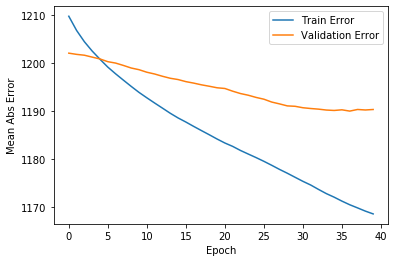

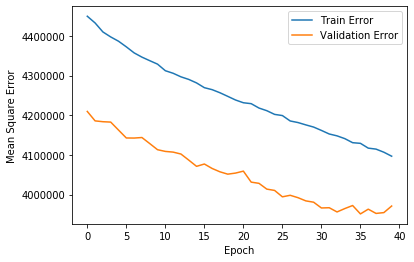


Best Fit is at Epoch 37
Lowest Validation Loss: 1189.937425368957
------------------------------------------------------------------------------------------

Model 1 Fold 2
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125545/125545 [==============================] - 9s 75us/sample - loss: 1180.5369 - mae: 1180.5356 - mse: 4032783.7500 - val_loss: 1164.3523 - val_mae: 1164.3525 - val_mse: 4085420.5000
Epoch 2/50
125545/125545 [==============================] - 9s 69us/sample - loss: 1177.6260 - mae: 1177.6268 - mse: 4017250.2500 - val_loss: 1166.5262 - val_mae: 1166.5255 - val_mse: 4099912.7500
Epoch 3/50
125545/125545 [==============================] - 8s 67us/sample - loss: 1175.8311 - mae: 1175.8306 - mse: 4013289.2500 - val_loss: 1168.0766 - val_mae: 1168.0756 - val_mse: 4082681.7500- mae: 1170. - ETA: 2s - loss
Epoch 4/50
125545/125545 [==============================] - 9s 69us/sample - loss: 1174.2264 - mae: 1174.2250 - mse: 3999253.5000 - val_loss: 1169.2781 - v

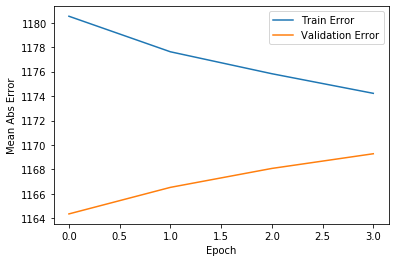

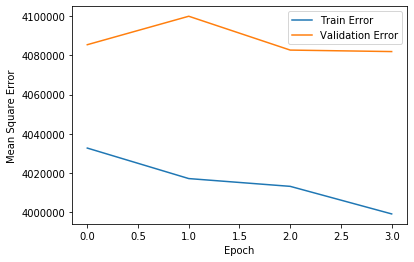


Best Fit is at Epoch 1
Lowest Validation Loss: 1164.3523119568413
------------------------------------------------------------------------------------------

Model 1 Fold 3
Train on 125546 samples, validate on 62772 samples
Epoch 1/50
125546/125546 [==============================] - 9s 68us/sample - loss: 1173.4279 - mae: 1173.4288 - mse: 4003673.7500 - val_loss: 1169.1114 - val_mae: 1169.1107 - val_mse: 4080154.7500
Epoch 2/50
125546/125546 [==============================] - 9s 69us/sample - loss: 1170.8037 - mae: 1170.8037 - mse: 3988918.5000 - val_loss: 1171.3087 - val_mae: 1171.3093 - val_mse: 4086074.7500
Epoch 3/50
125546/125546 [==============================] - 8s 68us/sample - loss: 1169.0018 - mae: 1169.0022 - mse: 3978755.5000 - val_loss: 1173.0742 - val_mae: 1173.0741 - val_mse: 4081948.7500
Epoch 4/50
125546/125546 [==============================] - 9s 73us/sample - loss: 1167.5236 - mae: 1167.5259 - mse: 3970154.5000 - val_loss: 1174.9044 - val_mae: 1174.9044 - val_mse: 

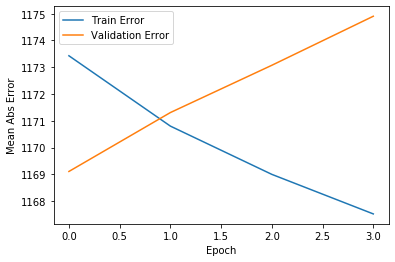

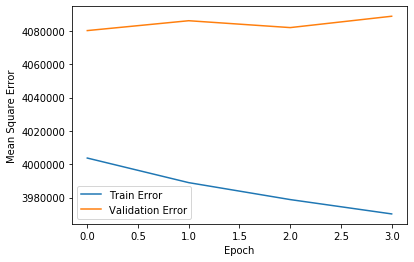


Best Fit is at Epoch 1
Lowest Validation Loss: 1169.1114169182592

Bagged Validation Loss for Model 1 = 1174.4670514146858
------------------------------------------------------------------------------------------

Model 2 Fold 1
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125545/125545 [==============================] - 12s 97us/sample - loss: 1566.5677 - mae: 1566.5674 - mse: 7434734.0000 - val_loss: 1239.8314 - val_mae: 1239.8312 - val_mse: 4341527.0000
Epoch 2/50
125545/125545 [==============================] - 13s 106us/sample - loss: 1233.4524 - mae: 1233.4536 - mse: 4746840.5000 - val_loss: 1215.5886 - val_mae: 1215.5889 - val_mse: 4156063.5000
Epoch 3/50
125545/125545 [==============================] - 13s 103us/sample - loss: 1212.7391 - mae: 1212.7396 - mse: 4605713.0000 - val_loss: 1206.5239 - val_mae: 1206.5244 - val_mse: 4048809.5000
Epoch 4/50
125545/125545 [==============================] - 13s 103us/sample - loss: 1201.7780 - mae: 1201.7773 - mse: 452

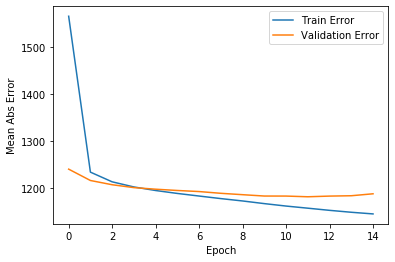

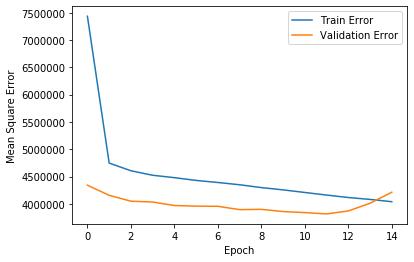


Best Fit is at Epoch 12
Lowest Validation Loss: 1180.8036491196299
------------------------------------------------------------------------------------------

Model 2 Fold 2
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125545/125545 [==============================] - 15s 121us/sample - loss: 1166.3003 - mae: 1166.3010 - mse: 4218252.5000 - val_loss: 1137.4913 - val_mae: 1137.4899 - val_mse: 3949225.7500
Epoch 2/50
125545/125545 [==============================] - 11s 91us/sample - loss: 1159.0657 - mae: 1159.0664 - mse: 4141785.7500 - val_loss: 1142.5868 - val_mae: 1142.5872 - val_mse: 3940348.0000
Epoch 3/50
125545/125545 [==============================] - 11s 89us/sample - loss: 1153.6281 - mae: 1153.6277 - mse: 4075031.2500 - val_loss: 1147.1373 - val_mae: 1147.1365 - val_mse: 3973283.7500s - loss: 1153.9852 - mae
Epoch 4/50
125545/125545 [==============================] - 11s 84us/sample - loss: 1148.7639 - mae: 1148.7628 - mse: 4019879.7500 - val_loss: 1155.0111 -

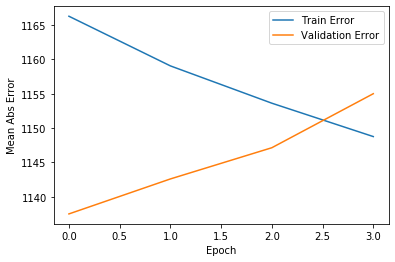

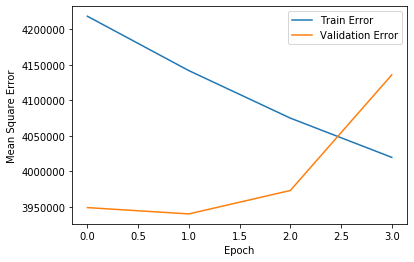


Best Fit is at Epoch 1
Lowest Validation Loss: 1137.4912948988817
------------------------------------------------------------------------------------------

Model 2 Fold 3
Train on 125546 samples, validate on 62772 samples
Epoch 1/50
125546/125546 [==============================] - 13s 101us/sample - loss: 1156.6879 - mae: 1156.6879 - mse: 4117398.2500 - val_loss: 1135.1886 - val_mae: 1135.1903 - val_mse: 3986068.0000
Epoch 2/50
125546/125546 [==============================] - 11s 85us/sample - loss: 1148.6431 - mae: 1148.6422 - mse: 4018609.7500 - val_loss: 1141.1097 - val_mae: 1141.1093 - val_mse: 4010580.5000
Epoch 3/50
125546/125546 [==============================] - 10s 84us/sample - loss: 1142.9615 - mae: 1142.9604 - mse: 3949955.5000 - val_loss: 1147.6518 - val_mae: 1147.6517 - val_mse: 4046176.5000
Epoch 4/50
125546/125546 [==============================] - 11s 87us/sample - loss: 1138.3528 - mae: 1138.3523 - mse: 3898852.5000 - val_loss: 1156.4909 - val_mae: 1156.4913 - val_

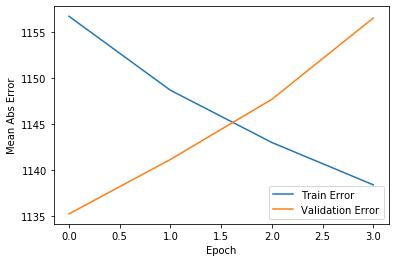

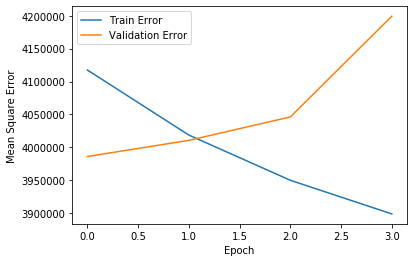


Best Fit is at Epoch 1
Lowest Validation Loss: 1135.1885829277235

Bagged Validation Loss for Model 2 = 1151.161175648745
------------------------------------------------------------------------------------------

Model 3 Fold 1
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125545/125545 [==============================] - 19s 149us/sample - loss: 1409.4680 - mae: 1409.4674 - mse: 5982919.5000 - val_loss: 1229.8703 - val_mae: 1229.8706 - val_mse: 4592844.0000
Epoch 2/50
125545/125545 [==============================] - 18s 146us/sample - loss: 1216.7275 - mae: 1216.7274 - mse: 4464768.5000 - val_loss: 1213.1814 - val_mae: 1213.1821 - val_mse: 4483849.0000
Epoch 3/50
125545/125545 [==============================] - 18s 141us/sample - loss: 1201.0310 - mae: 1201.0323 - mse: 4361407.5000 - val_loss: 1204.6046 - val_mae: 1204.6045 - val_mse: 4390195.5000
Epoch 4/50
125545/125545 [==============================] - 18s 142us/sample - loss: 1189.3552 - mae: 1189.3564 - mse: 428

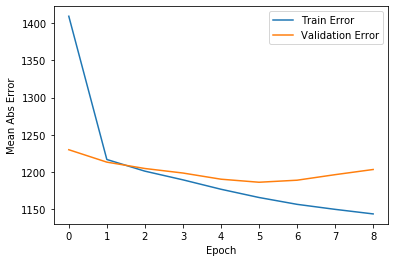

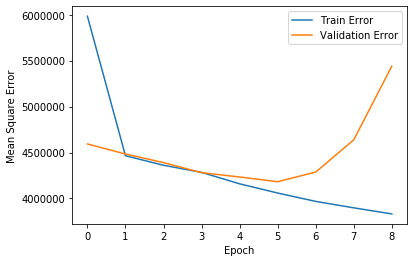


Best Fit is at Epoch 6
Lowest Validation Loss: 1186.1183208230823
------------------------------------------------------------------------------------------

Model 3 Fold 2
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125545/125545 [==============================] - 21s 166us/sample - loss: 1168.3034 - mae: 1168.3038 - mse: 4759681.5000 - val_loss: 1143.1567 - val_mae: 1143.1555 - val_mse: 3754260.0000
Epoch 2/50
125545/125545 [==============================] - 18s 142us/sample - loss: 1156.7430 - mae: 1156.7422 - mse: 4527345.5000 - val_loss: 1150.7642 - val_mae: 1150.7637 - val_mse: 3843627.5000
Epoch 3/50
125545/125545 [==============================] - 18s 143us/sample - loss: 1148.8670 - mae: 1148.8666 - mse: 4378545.5000 - val_loss: 1157.7751 - val_mae: 1157.7743 - val_mse: 3989661.7500
Epoch 4/50
125545/125545 [==============================] - 18s 143us/sample - loss: 1142.0467 - mae: 1142.0468 - mse: 4239063.5000 - val_loss: 1169.8129 - val_mae: 1169.8135 - v

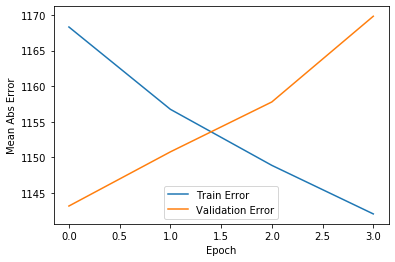

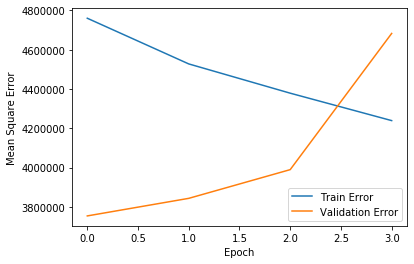


Best Fit is at Epoch 1
Lowest Validation Loss: 1143.1566760219487
------------------------------------------------------------------------------------------

Model 3 Fold 3
Train on 125546 samples, validate on 62772 samples
Epoch 1/50
125546/125546 [==============================] - 17s 132us/sample - loss: 1163.8249 - mae: 1163.8241 - mse: 4740277.5000 - val_loss: 1120.6716 - val_mae: 1120.6721 - val_mse: 3741905.5000
Epoch 2/50
125546/125546 [==============================] - 16s 125us/sample - loss: 1152.0813 - mae: 1152.0808 - mse: 4473431.5000 - val_loss: 1129.3437 - val_mae: 1129.3428 - val_mse: 3815018.5000
Epoch 3/50
125546/125546 [==============================] - 15s 120us/sample - loss: 1142.9642 - mae: 1142.9662 - mse: 4269593.0000 - val_loss: 1142.8440 - val_mae: 1142.8430 - val_mse: 4121651.5000
Epoch 4/50
125546/125546 [==============================] - 17s 134us/sample - loss: 1135.3725 - mae: 1135.3716 - mse: 4120781.0000 - val_loss: 1162.6200 - val_mae: 1162.6194 - v

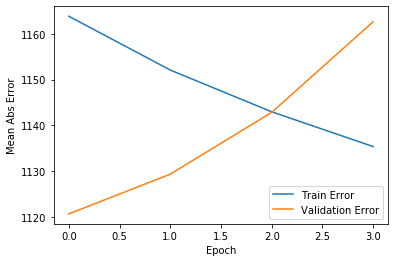

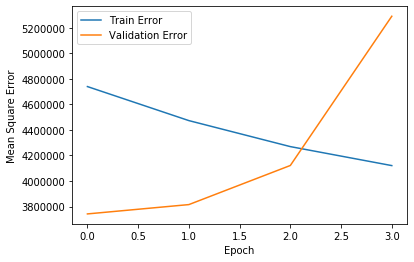


Best Fit is at Epoch 1
Lowest Validation Loss: 1120.6715640174584

Bagged Validation Loss for Model 3 = 1149.9821869541631
------------------------------------------------------------------------------------------

Model 4 Fold 1
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125545/125545 [==============================] - 13s 100us/sample - loss: 1443.5457 - mae: 1443.5463 - mse: 6216521.5000 - val_loss: 1245.0688 - val_mae: 1245.0703 - val_mse: 4666572.0000
Epoch 2/50
125545/125545 [==============================] - 10s 81us/sample - loss: 1228.0755 - mae: 1228.0768 - mse: 4542736.5000 - val_loss: 1223.0030 - val_mae: 1223.0035 - val_mse: 4455754.5000
Epoch 3/50
125545/125545 [==============================] - 10s 83us/sample - loss: 1208.9446 - mae: 1208.9447 - mse: 4390578.0000 - val_loss: 1213.2265 - val_mae: 1213.2264 - val_mse: 4420313.50001204.3681 - mae: 1204.36 - ETA: 4s - loss: 1206.5354 - mae: 1206.5363 - mse: 4572 - ETA: 4s - loss: 1206.2488 - mae: 1206.24

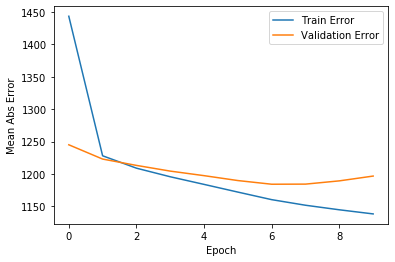

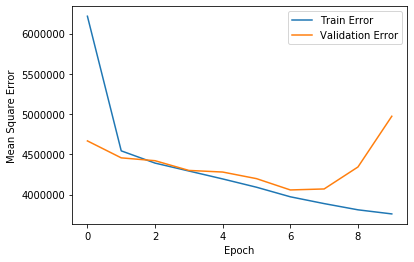


Best Fit is at Epoch 7
Lowest Validation Loss: 1184.1410327015815
------------------------------------------------------------------------------------------

Model 4 Fold 2
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125545/125545 [==============================] - 15s 122us/sample - loss: 1163.0849 - mae: 1163.0835 - mse: 4323189.5000 - val_loss: 1138.0070 - val_mae: 1138.0074 - val_mse: 3904745.7500
Epoch 2/50
125545/125545 [==============================] - 10s 80us/sample - loss: 1150.7669 - mae: 1150.7665 - mse: 4124151.0000 - val_loss: 1141.8999 - val_mae: 1141.8987 - val_mse: 3897228.2500
Epoch 3/50
125545/125545 [==============================] - 10s 81us/sample - loss: 1141.3434 - mae: 1141.3436 - mse: 3969058.2500 - val_loss: 1150.5812 - val_mae: 1150.5802 - val_mse: 3973209.7500
Epoch 4/50
125545/125545 [==============================] - 10s 80us/sample - loss: 1134.0400 - mae: 1134.0409 - mse: 3845035.5000 - val_loss: 1159.6659 - val_mae: 1159.6653 - val_

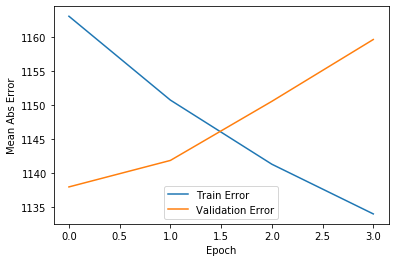

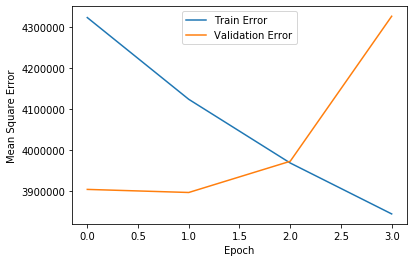


Best Fit is at Epoch 1
Lowest Validation Loss: 1138.0069645806648
------------------------------------------------------------------------------------------

Model 4 Fold 3
Train on 125546 samples, validate on 62772 samples
Epoch 1/50
125546/125546 [==============================] - 10s 83us/sample - loss: 1151.2717 - mae: 1151.2720 - mse: 4188625.0000 - val_loss: 1113.5682 - val_mae: 1113.5680 - val_mse: 3472885.5000
Epoch 2/50
125546/125546 [==============================] - 10s 80us/sample - loss: 1138.1021 - mae: 1138.1014 - mse: 3974529.0000 - val_loss: 1122.4708 - val_mae: 1122.4697 - val_mse: 3502816.5000
Epoch 3/50
125546/125546 [==============================] - 10s 77us/sample - loss: 1127.7992 - mae: 1127.7981 - mse: 3839808.0000 - val_loss: 1130.9940 - val_mae: 1130.9940 - val_mse: 3590301.0000
Epoch 4/50
125546/125546 [==============================] - 13s 105us/sample - loss: 1119.2448 - mae: 1119.2454 - mse: 3745536.2500 - val_loss: 1143.5403 - val_mae: 1143.5421 - val_

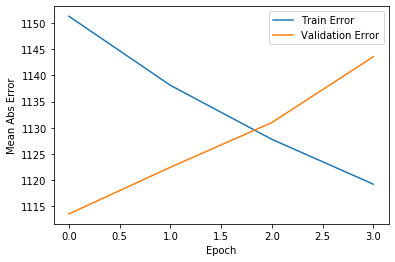

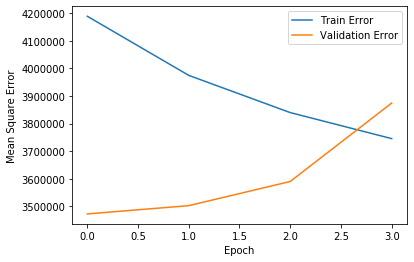


Best Fit is at Epoch 1
Lowest Validation Loss: 1113.5682337342885

Bagged Validation Loss for Model 4 = 1145.2387436721783
------------------------------------------------------------------------------------------

Model 5 Fold 1
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125545/125545 [==============================] - 12s 94us/sample - loss: 1519.2712 - mae: 1519.2715 - mse: 6659053.0000 - val_loss: 1277.0709 - val_mae: 1277.0704 - val_mse: 4991385.5000
Epoch 2/50
125545/125545 [==============================] - 11s 91us/sample - loss: 1362.3599 - mae: 1362.3580 - mse: 5356273.0000 - val_loss: 1253.4575 - val_mae: 1253.4565 - val_mse: 4830605.5000
Epoch 3/50
125545/125545 [==============================] - 12s 95us/sample - loss: 1334.6946 - mae: 1334.6947 - mse: 5161329.0000 - val_loss: 1231.8703 - val_mae: 1231.8688 - val_mse: 4569487.0000s: 1336.1478 - mae: 1336.1476
Epoch 4/50
125545/125545 [==============================] - 12s 96us/sample - loss: 1315.1911 -

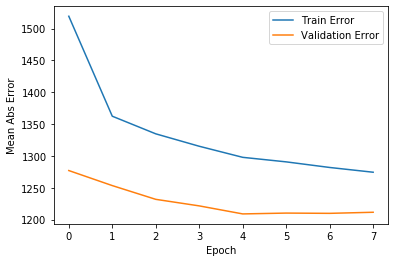

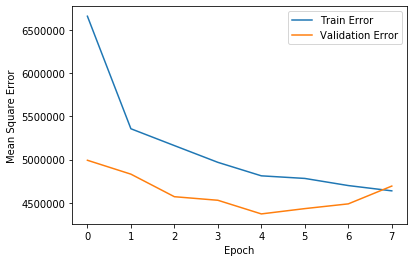


Best Fit is at Epoch 5
Lowest Validation Loss: 1208.989283714983
------------------------------------------------------------------------------------------

Model 5 Fold 2
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125545/125545 [==============================] - 16s 131us/sample - loss: 1294.5851 - mae: 1294.5848 - mse: 5005361.0000 - val_loss: 1161.2549 - val_mae: 1161.2543 - val_mse: 3989440.2500
Epoch 2/50
125545/125545 [==============================] - 12s 95us/sample - loss: 1286.8287 - mae: 1286.8276 - mse: 4868429.5000 - val_loss: 1165.7756 - val_mae: 1165.7758 - val_mse: 4026477.7500
Epoch 3/50
125545/125545 [==============================] - 12s 94us/sample - loss: 1281.0725 - mae: 1281.0728 - mse: 4842514.5000 - val_loss: 1167.0771 - val_mae: 1167.0773 - val_mse: 4002405.5000
Epoch 4/50
125545/125545 [==============================] - 12s 94us/sample - loss: 1275.2440 - mae: 1275.2445 - mse: 4704931.5000 - val_loss: 1172.7412 - val_mae: 1172.7406 - val_m

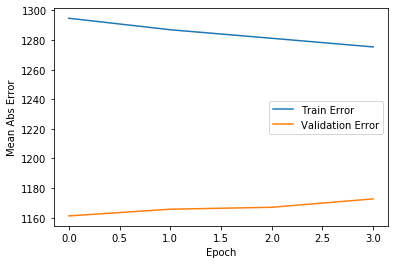

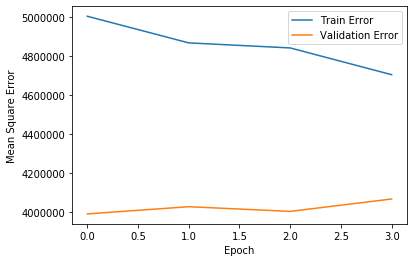


Best Fit is at Epoch 1
Lowest Validation Loss: 1161.2549043142833
------------------------------------------------------------------------------------------

Model 5 Fold 3
Train on 125546 samples, validate on 62772 samples
Epoch 1/50
125546/125546 [==============================] - 12s 93us/sample - loss: 1280.0482 - mae: 1280.0490 - mse: 4709108.0000 - val_loss: 1152.7337 - val_mae: 1152.7323 - val_mse: 4073553.5000
Epoch 2/50
125546/125546 [==============================] - 12s 93us/sample - loss: 1276.5357 - mae: 1276.5363 - mse: 4655751.0000 - val_loss: 1155.3093 - val_mae: 1155.3091 - val_mse: 4043888.7500
Epoch 3/50
125546/125546 [==============================] - 12s 94us/sample - loss: 1273.9994 - mae: 1274.0004 - mse: 4662868.5000 - val_loss: 1160.2165 - val_mae: 1160.2173 - val_mse: 4114993.75007 - mae: 1278.1077 - E - ETA: 2s -
Epoch 4/50
125546/125546 [==============================] - 12s 98us/sample - loss: 1270.7227 - mae: 1270.7234 - mse: 4646913.0000 - val_loss: 1165

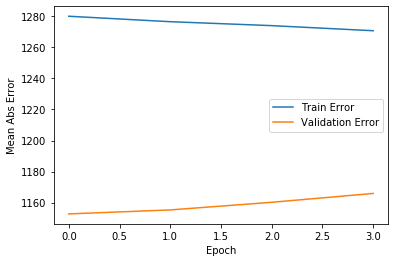

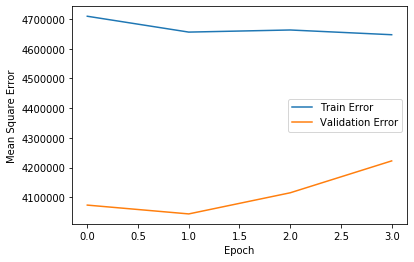


Best Fit is at Epoch 1
Lowest Validation Loss: 1152.733682871518

Bagged Validation Loss for Model 5 = 1174.325956966928
------------------------------------------------------------------------------------------

Model 6 Fold 1
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125545/125545 [==============================] - 15s 119us/sample - loss: 1442.2237 - mae: 1442.2252 - mse: 6113903.0000 - val_loss: 1234.2868 - val_mae: 1234.2847 - val_mse: 4532052.0000
Epoch 2/50
125545/125545 [==============================] - 16s 128us/sample - loss: 1295.5153 - mae: 1295.5160 - mse: 4920703.5000 - val_loss: 1197.8108 - val_mae: 1197.8104 - val_mse: 4265251.0000
Epoch 3/50
125545/125545 [==============================] - 16s 126us/sample - loss: 1258.7446 - mae: 1258.7438 - mse: 4600704.0000 - val_loss: 1183.3071 - val_mae: 1183.3073 - val_mse: 4106631.0000
Epoch 4/50
125545/125545 [==============================] - 15s 119us/sample - loss: 1251.9508 - mae: 1251.9525 - mse: 4544

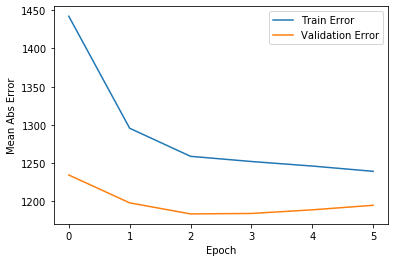

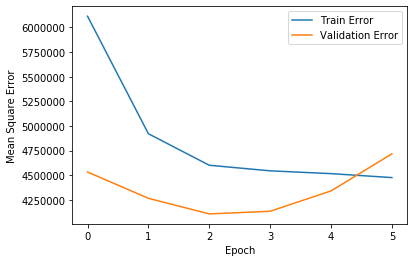


Best Fit is at Epoch 3
Lowest Validation Loss: 1183.307101344997
------------------------------------------------------------------------------------------

Model 6 Fold 2
Train on 125545 samples, validate on 62773 samples
Epoch 1/50
125536/125545 [============================>.] - ETA: 0s - loss: 1246.7433 - mae: 1246.7432 - mse: 4749631.0000

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(3,shuffle=True)
model_index=0
history_list=[]
bagged_score=[]
for model in model_list:
    model_index+=1
    fold=0
    avg_score=[]
    for train,test in kf.split(X):
        fold+=1
        print('-'*90)
        print('\nModel',model_index,'Fold',fold)

        X_train = X[train]
        y_train = y[train]
        val_X = X[test]
        val_y = y[test]
        
        early_stopping = EarlyStopping(monitor='val_loss',patience=3)
        history = model.fit(x=X_train, y=y_train, validation_data=(val_X, val_y), 
                            epochs=50, verbose=1, callbacks=[early_stopping])
        plot_history(history)
        history_list.append(history)
        avg_score.append(min(history.history['val_loss']))
        print('\nBest Fit is at Epoch', history.history['val_loss'].index(min(history.history['val_loss']))+1)
        print('Lowest Validation Loss:', min(history.history['val_loss']))
    bag_score= sum(avg_score)/len(avg_score)
    bagged_score.append(bag_score)
    print('\nBagged Validation Loss for Model',model_index,'=',bag_score)

### From the plotted graphs and epoch results, we can observce that:
Model 1 converges to MAE = 1190

Model 2 converges to MAE = 1182

Model 3 converges to MAE = 1186

Model 4 converges to MAE = 1184

Model 5 converges to MAE = 1210

Model 6 converges to MAE = 1190


# Embed Categorical Features instead of One-hot Encode

In [ ]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Input, ReLU, Softmax, Dropout,Embedding,Flatten,Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
X = train[cat_features].values
X = X.tolist()
X = [','.join(X[n])for n in range(len(X))]

vocab_size= 50
encoded_cat = [one_hot(item,vocab_size)for item in X]

# Reduce the dimensions of the vectors
Max_length = 20

padded_cat = pad_sequences(encoded_cat,maxlen=Max_length,padding='post')
padded_cat

In [ ]:
X = np.concatenate((train[cont_features].values,padded_cat),axis=1)
X = StandardScaler().fit_transform(X)
train_X = X

In [ ]:
# Re-initialize all the models
def mlp_1_small():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    h0 = ReLU()(Dense(8)(input))
    out = (Dense(io_shape[1])(h0))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )
        
    return model

    
def mlp_1_medium():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    h0 = ReLU()(Dense(128)(input))
    out = (Dense(io_shape[1])(h0))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )
    
    return model

def mlp_1_large():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    h0 = ReLU()(Dense(512)(input))
    out = (Dense(io_shape[1])(h0))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )
    
    return model
def mlp_2_small():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    #dropout0 = Dropout(0.4)(input)
    h0 = ReLU()(Dense(64)(input))
    #dropout1 = Dropout(0.5)(h0)
    h1 = ReLU()(Dense(16)(h0))
    #dropout2 = Dropout(0.5)(h1)
    out = (Dense(io_shape[1])(h1))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )
    
    return model

def mlp_2_medium():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    h0 = ReLU()(Dense(128)(input))
    dropout1 = Dropout(0.5)(h0)
    h1 = ReLU()(Dense(32)(dropout1))
    dropout2 = Dropout(0.5)(h1)
    out = (Dense(io_shape[1])(dropout2))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )
   
    return model

def mlp_2_large():
    io_shape = (train_X.shape[1], 1)
    input = Input(shape=(io_shape[0],))
    h0 = ReLU()(Dense(256)(input))
    dropout1 = Dropout(0.5)(h0)
    h1 = ReLU()(Dense(64)(dropout1))
    dropout2 = Dropout(0.5)(h1)
    out = (Dense(io_shape[1])(dropout2))
    model = Model(inputs=input, outputs=out)
    model.compile(
        optimizer=Adam(lr=0.001),
        loss='mae',
        metrics= ['mae','mse']
    )

    return model

In [ ]:
# Trainning on embedded features+numerical features
from sklearn.model_selection import KFold
kf = KFold(3,shuffle=True)
model_index=0
history_list_embed=[]
bagged_score_embed=[]
for model in model_list:
    model_index+=1
    fold=0
    avg_score=[]
    for train,test in kf.split(X):
        fold+=1
        print('-'*90)
        print('\nModel',model_index,'Fold',fold)

        X_train = X[train]
        y_train = y[train]
        val_X = X[test]
        val_y = y[test]
        
        early_stopping = EarlyStopping(monitor='val_loss',patience=3)
        history = model.fit(x=X_train, y=y_train, validation_data=(val_X, val_y), 
                            epochs=50, verbose=1, callbacks=[early_stopping])
        plot_history(history)
        history_list_embed.append(history)
        avg_score.append(min(history.history['val_loss']))
        print('\nBest Fit is at Epoch', history.history['val_loss'].index(min(history.history['val_loss']))+1)
        print('Lowest Validation Loss:', min(history.history['val_loss']))
    bag_score= sum(avg_score)/len(avg_score)
    bagged_score_embed.append(bag_score)
    print('\nBagged Validation Loss for Model',model_index,'=',bag_score)

### From the plotted graphs and epoch results, we can observce that:
Model 1 converges to MAE = 1734

Model 2 converges to MAE = 1648

Model 3 converges to MAE = 1617

Model 4 converges to MAE = 1570

Model 5 converges to MAE = 1659

Model 6 converges to MAE = 1637


# Prediction

In [28]:
mae = [1274,1802,1434,1907,1309,1795,1265,1801,1486,1938,1207,1967,1503,1800,1167,1785,1182,1570]
comb = ['LR','LR_cont','KNN','KNN_cont','CART','CART_cont','LinearSVR','LinearSVR_cont','SVM','SVM_cont','RF','RF_cont','Ada','Ada_cont','XGB','XGB_cont','MLP','MLP_cont']
import matplotlib.pyplot as plt

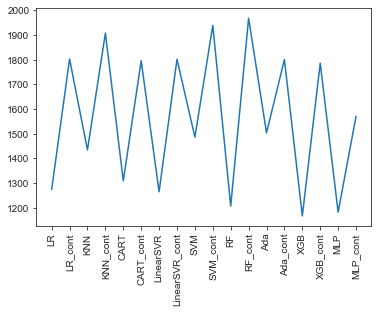

In [29]:
#Plot the MAE of all combinations
fig, ax = plt.subplots()
plt.plot(mae)
#Set the tick names to names of combinations
ax.set_xticks(range(len(comb)))
ax.set_xticklabels(comb,rotation='vertical')
#Plot the accuracy for all combinations
plt.show() 

In [76]:
# Prediction
# Make predictions using XGB as it gave the best estimated performance        

X = np.concatenate((X_train,X_val),axis=0)
del X_train
del X_val
Y = np.concatenate((Y_train,Y_val),axis=0)
del Y_train
del Y_val

n_estimators = 100

#Best model definition
best_model = XGBRegressor(n_estimators=n_estimators,seed=seed)
best_model.fit(X,Y)
del X
del Y

#Read test dataset
dataset_test = pd.read_csv("test.csv")
#Drop unnecessary columns
ID = dataset_test['id']
dataset_test.drop('id',axis=1,inplace=True)

In [78]:
#One hot encode all categorical attributes
cats = []
for i in range(0, split):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(dataset_test.iloc[:,i])
    feature = feature.reshape(dataset_test.shape[0], 1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    cats.append(feature)

# Make a 2D array from a list of 1D arrays
encoded_cats = np.column_stack(cats)

#del cats

#Concatenate encoded attributes with continuous attributes
X_test = np.concatenate((encoded_cats,dataset_test.iloc[:,split:].values),axis=1)

#del encoded_cats
#del dataset_test

In [79]:
predictions = best_model.predict(X_test)

In [80]:
# Write submissions to output file in the correct format
with open("submission.csv", "w") as subfile:
    subfile.write("id,loss\n")
    for i, pred in enumerate(list(predictions)):
        subfile.write("%s,%s\n"%(ID[i],pred))

# Output Test

In [ ]:
test = pd.read_csv('test.csv')
# use best model to predict and output